<a href="https://colab.research.google.com/github/sanidhya1996/Unsupervised-ML./blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - NETFLIX MOVIES AND TV SHOWS CLUSTERING



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here:-
https://github.com/sanidhya1996/Unsupervised-ML.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [91]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# for mlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch


### Dataset Loading

In [92]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML/CP4/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [94]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [95]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [96]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [97]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [98]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

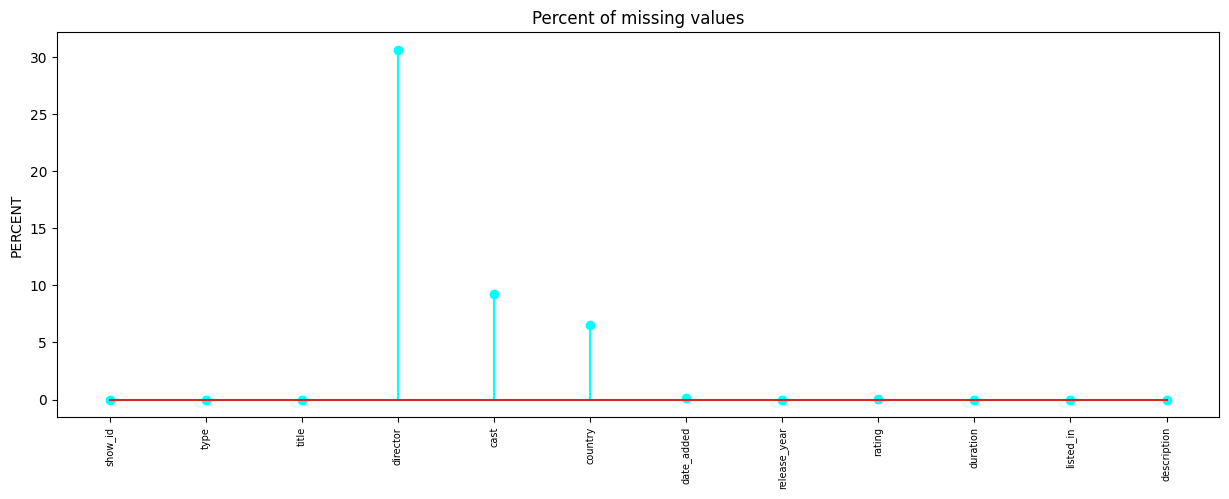

In [99]:
# Visualizing the missing values
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(15,5))
ax = plt.stem(missing['index'], missing[0], linefmt='cyan')
plt.xticks(rotation = 90, fontsize = 7)
plt.title("Percent of missing values")
plt.ylabel("PERCENT")
plt.show()

<Axes: >

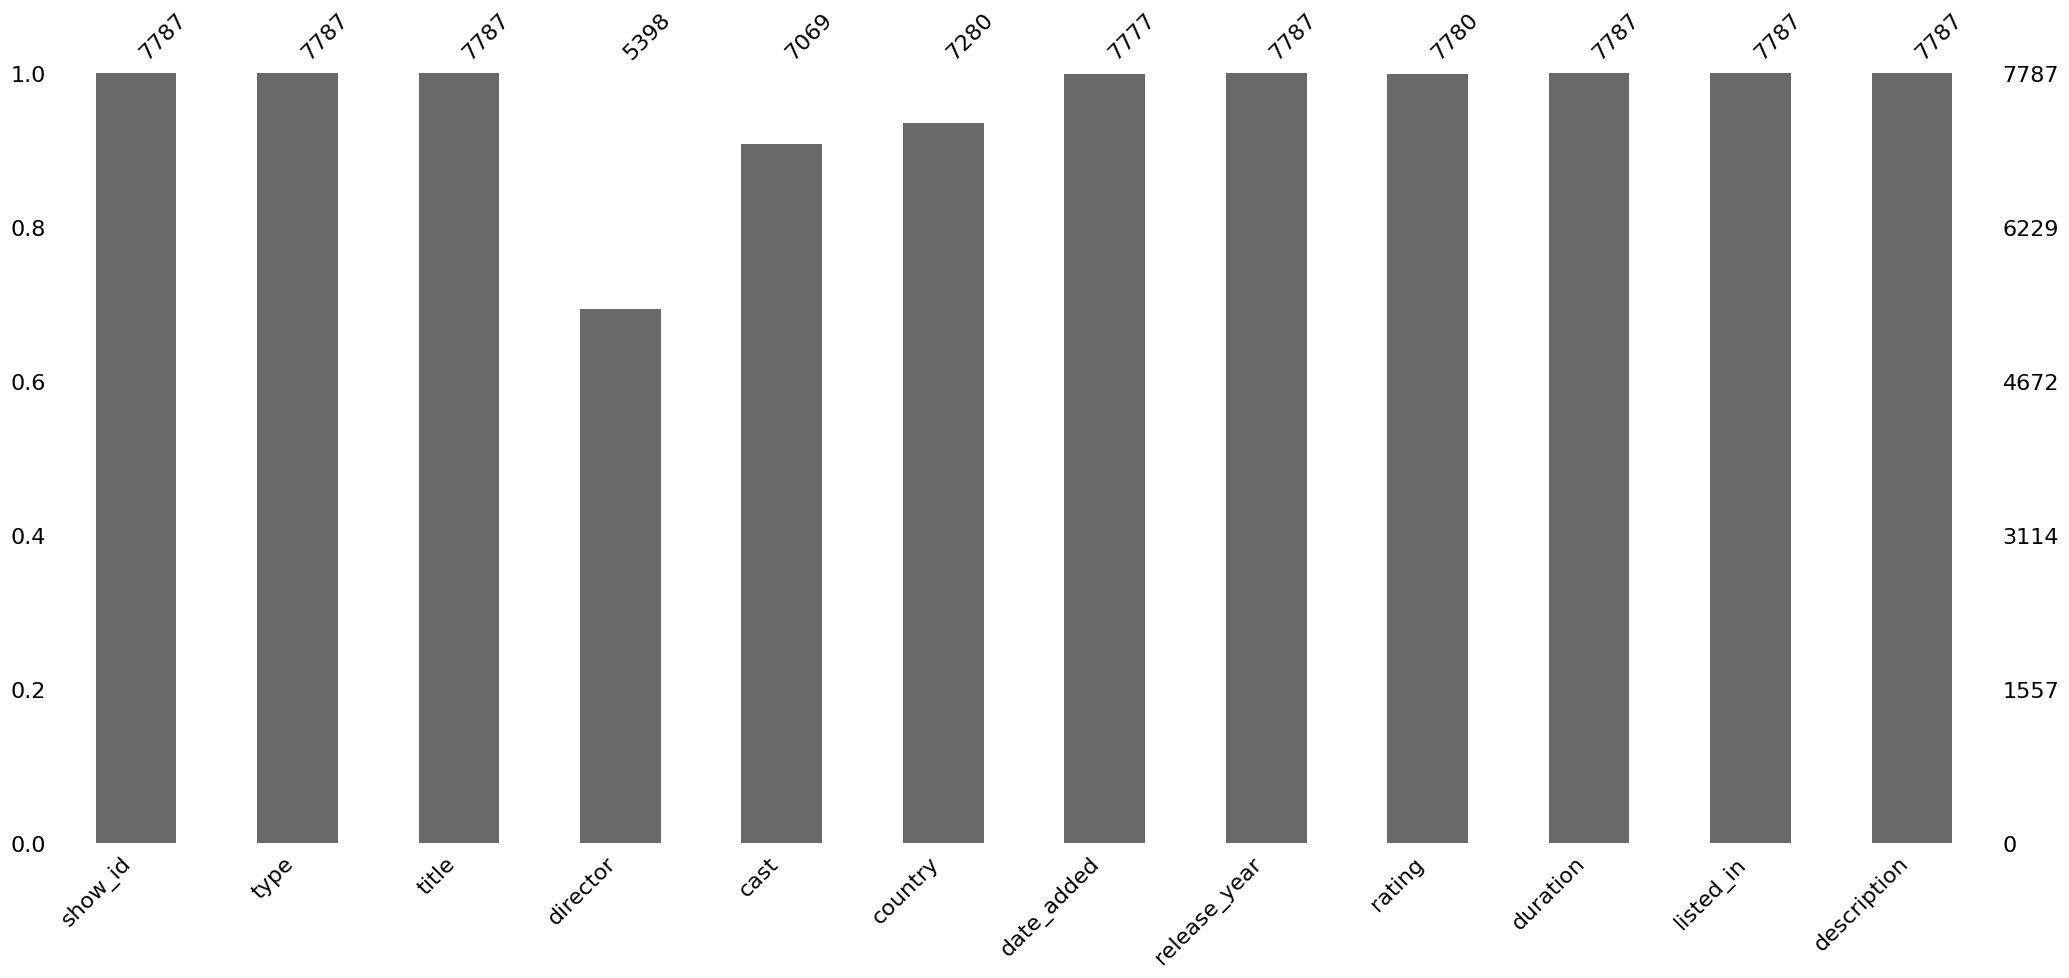

In [100]:
msno.bar(df)

### What did you know about your dataset?

Answer Here:-The dataset contains 7,787 rows and 12 columns. Among the columns, the "Release Year" column is of integer type, while the remaining columns are of object (string) data type. The dataset does not have any duplicate values, but there are some null values present in four columns. Notably, the "Director" column has the highest number of null values. Therefore, in order to proceed with further analysis or work, it is necessary to perform data cleaning to handle the null values appropriately.

## ***2. Understanding Your Variables***

In [101]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [102]:
# Dataset Describe
df.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description


* show_id : Unique ID for every Movie / Tv Show

* type : Identifier - A Movie or TV Show

* title : Title of the Movie / Tv Show

* director : Director of the Movie

* cast : Actors involved in the movie / show

* country : Country where the movie / show was produced

* date_added : Date it was added on Netflix

* release_year : Actual Releaseyear of the movie / show

* rating : TV Rating of the movie / show

* duration : Total Duration - in minutes or number of seasons

* listed_in : Genere

* description: The Summary description

### Check Unique Values for each variable.

In [103]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [104]:
# Write your code to make your dataset analysis ready.
df[['director', 'cast','country']] = df[['director','cast','country']].fillna('unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis = 0, inplace = True)

In [105]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [106]:
#Create new features to store date, day, month and year seperately.
df["date_added"]=pd.to_datetime(df['date_added']) #First convert date_added to date time format.
df['days'] = df['date_added'].dt.day         # Compute day.
df['month'] = df['date_added'].dt.month
df['year'] = df['date_added'].dt.year

In [107]:
df[["days","year","month"]].sample(6).T

,2108,3326,6376,1525,470,6254
days,14,1,1,15,30,15
year,2020,2018,2018,2019,2020,2020
month,5,11,1,12,9,11


In [108]:
#working with the country column
df['country'] = df['country'].apply(lambda x: x.split(',')[0])

In [109]:
df['country'].value_counts().reset_index().T

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
index,United States,India,United Kingdom,unknown,Canada,Japan,France,South Korea,Spain,Mexico,...,Mauritius,Puerto Rico,Jordan,Slovenia,West Germany,Zimbabwe,Namibia,Soviet Union,Iran,Somalia
country,2877,956,576,506,259,236,196,194,168,123,...,1,1,1,1,1,1,1,1,1,1


In [110]:
#Spliting the type column into category
movies = df[df['type']=='Movie']
tv_shows = df[df['type']=='TV Show']

In [111]:
 #working with the duration column
df['duration'].unique()

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min', '103 min', '89 min',
       '91 min', '149 min', '144 min', '124 min', '87 min', '110 min',
       '128 min', '117 min', '100 min', '2 Seasons', '84 min', '99 min',
       '90 min', '102 min', '104 min', '105 min', '56 min', '125 min',
       '81 min', '97 min', '106 min', '107 min', '109 min', '44 min',
       '75 min', '101 min', '3 Seasons', '37 min', '113 min', '114 min',
       '130 min', '94 min', '140 min', '135 min', '82 min', '70 min',
       '121 min', '92 min', '164 min', '53 min', '83 min', '116 min',
       '86 min', '120 min', '96 min', '126 min', '129 min', '77 min',
       '137 min', '148 min', '28 min', '122 min', '176 min', '85 min',
       '22 min', '68 min', '111 min', '29 min', '142 min', '168 min',
       '21 min', '59 min', '20 min', '98 min', '108 min', '76 min',
       '26 min', '156 min', '30 min', '57 min', '150 min', '133 min',
       '1

In [112]:
#slecting the duration for movies and tv show
tv_shows_duration = tv_shows['duration'].reset_index()
movies_duration = movies['duration'].reset_index()

In [113]:
# Removing string values from duration _tv_shows and converting it to int
tv_shows_duration.duration = tv_shows_duration.duration.str.replace(' Season', '')
tv_shows_duration.duration = tv_shows_duration.duration.str.replace(' Seasons', '')
tv_shows_duration.duration = tv_shows_duration.duration.str.replace('s', '')
tv_shows_duration.duration = tv_shows_duration.duration.astype(str).astype(int)

In [114]:
# Removing string values from movie duration and converting into int
movies_duration.duration = movies_duration.duration.str.replace(' min', '')
movies_duration.duration = movies_duration.duration.astype(str).astype(int)

### What all manipulations have you done and insights you found?

Answer Here:-
* We addressed the issue of null values in specific columns. Since dropping these columns would result in data loss, we replaced the NaN values in the "country," "director," and "cast" columns with the value "unknown" to indicate missing information.

* In the "rating" column, which also had missing values, we handled them by replacing the NaN values with the mode value of the column. By doing this, we assigned the most frequently occurring rating to the missing entries.

* In order to gain more insights from the "date" column, we performed further data manipulation. We split the column into separate components for months, years, and days. This breakdown provides us with more detailed temporal information for analysis purposes.

* To facilitate separate analysis for TV shows and movies, we split the "type" column into two distinct categories. This allows us to distinguish and study the data based on whether it represents a TV show or a movie.

* We removed specific strings from the duration columns of both the TV shows and movies DataFrames. For TV shows, we removed the strings "Season," "Seasons," and "s" using 'str.replace()'. This allowed the duration column to represent the number of seasons, which we then converted from strings to integers.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

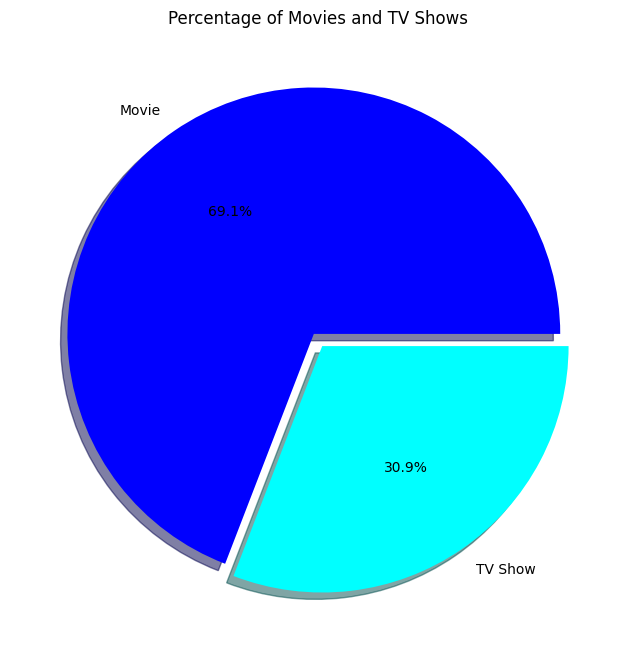

In [115]:
# Chart - 1 visualization code
plt.figure(figsize=(15,8))
plt.title("Percentage of Movies and TV Shows")
graph = plt.pie(df.type.value_counts(),shadow= True,colors = ("blue","Cyan"),explode = (0.03,0.03),
                labels=df.type.value_counts().index,autopct='%1.1f%%')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here:-
A pie plot is a circular chart that shows the relative size of different parts of a whole. The pie chart is divided into slices, and each slice represents a different part of the whole. The size of each slice is proportional to the size of the part it represents.


##### 2. What is/are the insight(s) found from the chart?

Answer Here:-Based on the provided pie plot, it can be observed that movies constitute the majority of the content, accounting for 69.1%. On the other hand, TV shows comprise only 31.9% of the content.

This analysis allows us to visually compare the proportion of movies and TV shows in the dataset, clearly indicating that movies contribute to a larger portion of the content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:-The gained insights can potentially help create a positive business impact. By understanding that movies constitute a significant portion of the content (69.1%), businesses can focus their efforts on acquiring and producing popular movies to attract a larger audience. This knowledge can guide content acquisition strategies, advertising campaigns, and partnerships to maximize revenue and viewership.

However, the insight that TV shows represent a smaller portion (31.9%) might suggest a potential area for negative growth if not managed properly. If the business heavily relies on TV shows but neglects the significant demand for movies, it could miss out on a substantial audience and revenue potential. To mitigate this, businesses can evaluate their content portfolio, invest in popular TV shows, or diversify their offerings to cater to a broader audience.

Overall, the key is to leverage the insight of movies being the dominant content while simultaneously addressing the TV show segment to ensure a well-rounded content strategy and optimize business outcomes.

#### Chart - 2

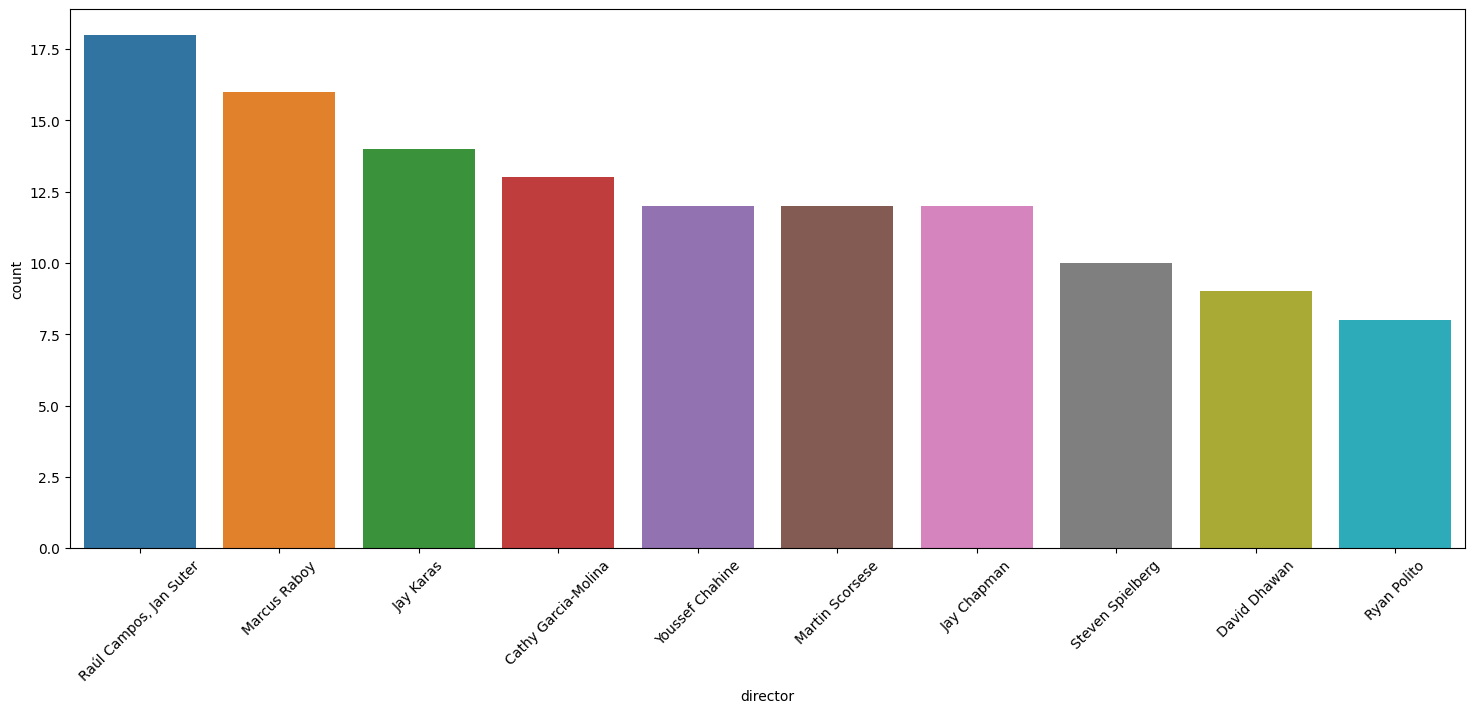

In [116]:
# Chart - 2 visualization code
#Excluding the unknown value from the director column
filtered_df  = df[df['director']!='unknown']

#filtering top 10 directors
top_10_directors = filtered_df ['director'].value_counts().head(10)
top_10_directors = top_10_directors.reset_index()
top_10_directors.columns = ['director','count']

#plotting the graph
plt.subplots(figsize=(18,7))
sns.barplot(x='director',y='count',data = top_10_directors)
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.:-
A bar plot is a type of graphical representation that uses bars to show the relative size of different categories. The bars are typically vertical, but they can also be horizontal. The height or length of each bar is proportional to the value it represents.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:-Raúl Campos and Jan Suter have directed the highest number of movies, indicating their prolific involvement in the film industry. With 18 movies each, they hold the top position among all directors in the dataset.

Marcus Raboy closely follows with 16 movies directed, securing the second-highest count. This suggests a significant contribution to the film industry as well.

Jay Karas, with 14 movies directed, ranks third among all directors in terms of the number of movies. This highlights his substantial involvement and impact in the film industry.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:-The insights gained from the directors' movie counts can potentially have a positive business impact. Directors like Raúl Campos, Jan Suter, Marcus Raboy, and Jay Karas have directed a significant number of movies, indicating their success and experience in the industry. This knowledge can help businesses identify and collaborate with successful directors, potentially leading to the creation of high-quality and popular content.

However, it's important to consider other factors like script quality, production budget, marketing efforts, and audience preferences for sustained positive growth. Relying solely on a limited pool of directors may limit creative diversity and innovation, which can have a negative impact if audience preferences shift or the market becomes oversaturated.

To achieve a balanced approach, businesses should consider multiple factors and adapt their strategies to the dynamic nature of the film industry.

#### Chart - 3

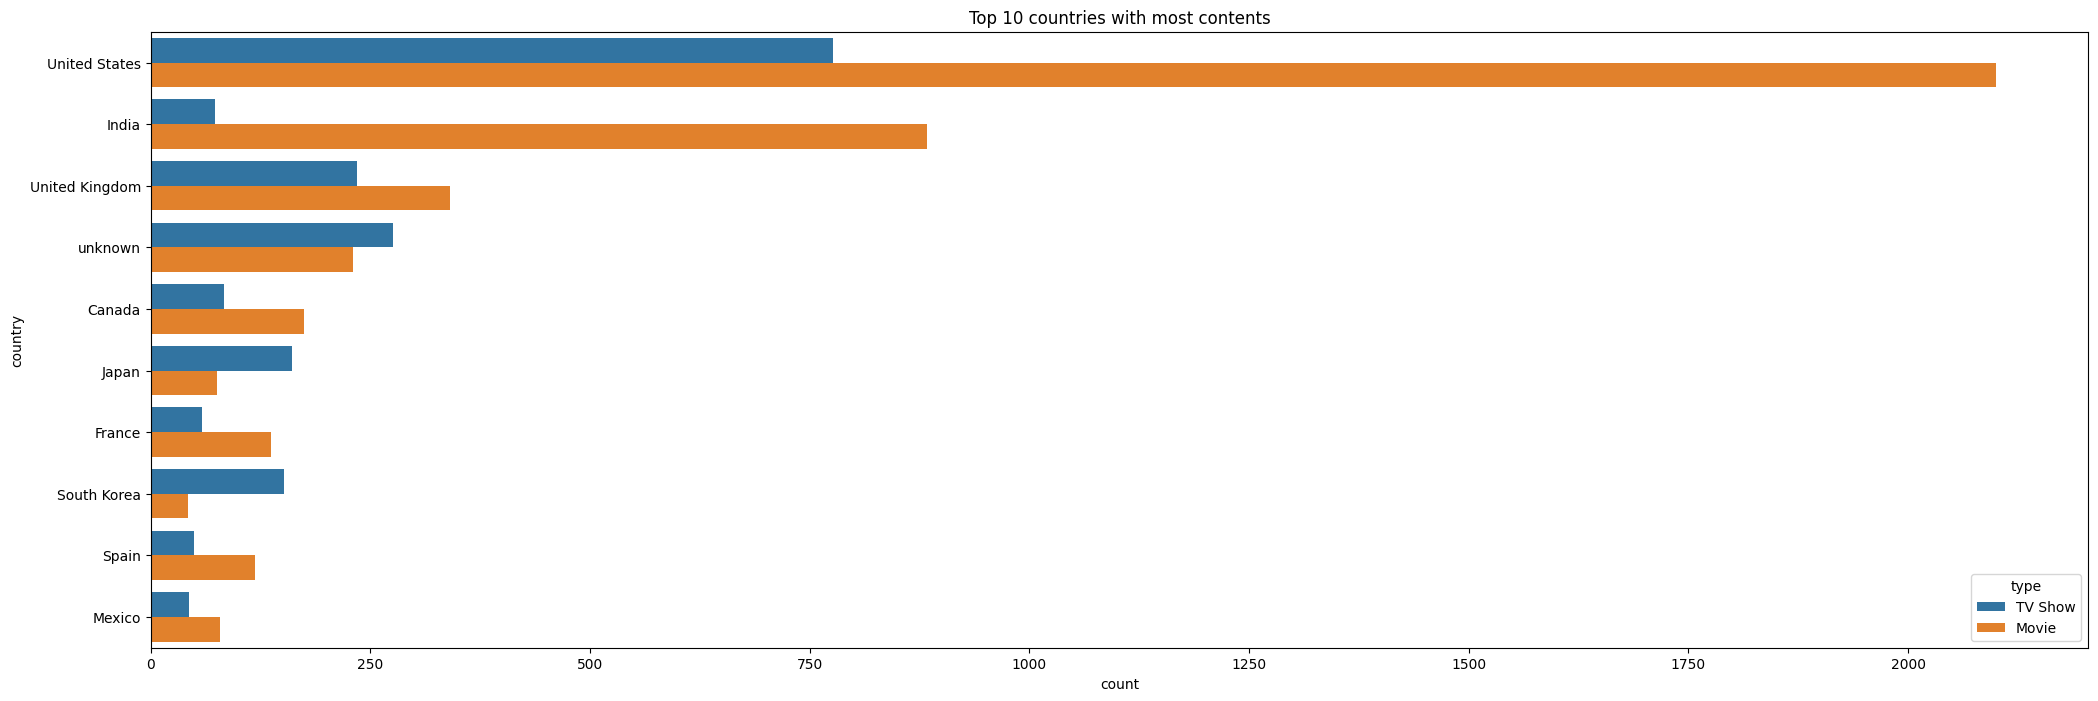

In [117]:
# Chart - 3 visualization code
plt.figure(figsize=(25,8))
sns.countplot(y=df['country'],order=df['country'].value_counts().index[0:10], hue=df['type'])
plt.xticks(rotation=360)
plt.title('Top 10 countries with most contents')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here:-A count plot is a type of bar plot that is used to show the number of observations in each category of a categorical variable. The bars in a count plot are typically vertical, but they can also be horizontal. The height of each bar is proportional to the number of observations in the category it represents.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:- The United States has the highest number of content overall, with a greater number of movies compared to TV shows. This highlights the dominant position of the United States in the content industry and the popularity of movies within their content offerings.

India ranks second in terms of the number of content, with a higher number of movies compared to TV shows. This showcases the significant production of movies in India and their influence on the content landscape.

Japan and South Korea stand out as countries where the number of TV shows is higher than movies in terms of content. This suggests a specific focus on producing and consuming TV shows in these countries.

Overall, these insights demonstrate the content distribution patterns across different countries, highlighting the prevalence of movies in the United States and India, while emphasizing the emphasis on TV shows in Japan and South Korea.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:-The gained insights have the potential to create a positive business impact, but it also depends on how they are utilized and contextualized within specific business strategies. Here's an assessment of their potential impact:

Positive Business Impact:

The insight that the United States has the highest number of content, with a greater number of movies, can be leveraged by businesses to target and cater to the preferences of the US audience. This understanding can guide content acquisition, production, and distribution strategies, potentially leading to increased viewership and revenue.

Similarly, the insight about India's significant production of movies presents an opportunity for businesses to tap into the Indian market, either through content collaborations, distribution partnerships, or marketing strategies. India's thriving film industry offers a vast potential audience and revenue possibilities.

For countries like Japan and South Korea, where the number of TV shows outweighs movies, businesses can focus on acquiring or producing TV shows tailored to the preferences of those specific markets. By aligning their content offerings with local demand, businesses can target the audience effectively and maximize viewership.

Negative Growth Considerations:
While the insights provide valuable information, there are no direct insights that would lead to negative growth. However, it's essential to consider the potential risks associated with relying solely on specific markets or content formats. Depending solely on one market, such as the United States or India, may limit international growth opportunities. Additionally, focusing only on TV shows in Japan and South Korea may overlook potential audience segments interested in movies.

To ensure positive business impact and sustainable growth, it's crucial to balance insights with a comprehensive market analysis, audience preferences, and diversification strategies. Businesses should adapt their strategies based on market dynamics, changing preferences, and global content trends.

#### Chart - 4

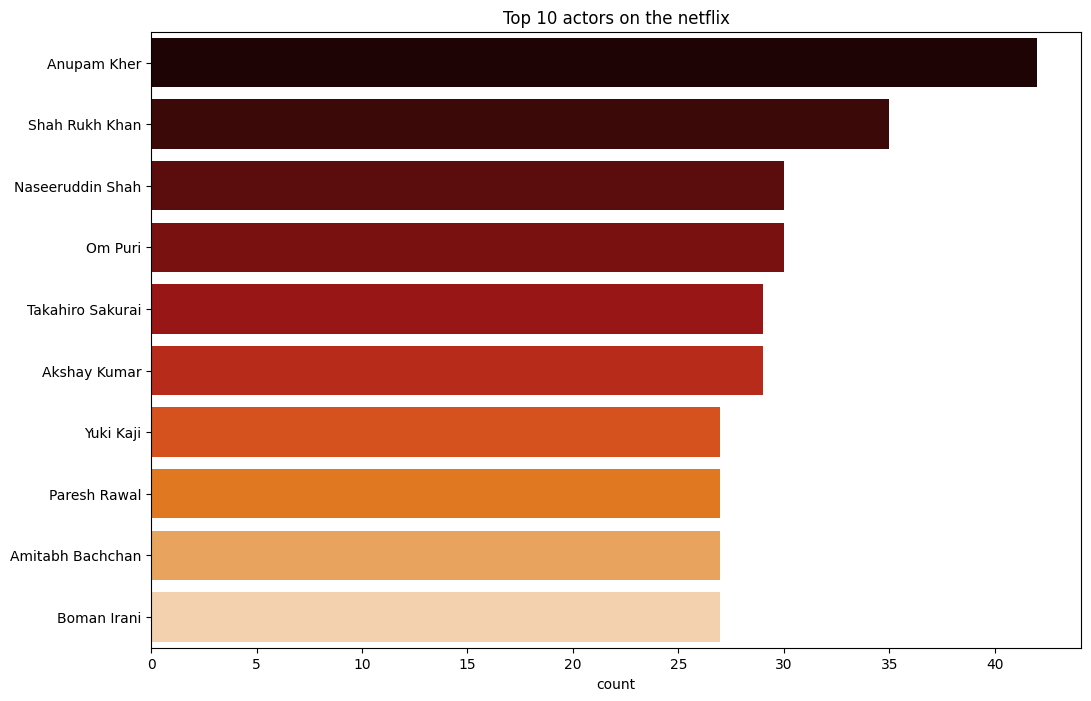

In [118]:
# Chart - 4 visualization code
# Graph for top 10 actors
actors_name = df[df.cast != ' '].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)



plt.figure(figsize = (12,8))
sns.countplot(y = actors_name, order=actors_name.value_counts().index[1:11], palette='gist_heat')
plt.title("Top 10 actors on the netflix")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here:-A count plot, also known as a bar plot, is a type of visual representation that displays the count or frequency of categorical data. It is used to show the distribution or frequency of different categories within a dataset.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:-Based on the analysis, it was discovered that Anupam Kher is the leading actor on Netflix, having appeared in the highest number of movies. He is closely followed by Shahrukh Khan. Notably, the presence of multiple Indian actors within the top 10 further emphasizes their substantial influence and popularity in Netflix movies. This finding showcases the diversity and global appeal of Indian actors, demonstrating their significant contributions to the content available on the streaming platform.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:-The gained insights regarding the top actors on Netflix can potentially have a positive business impact. Here's an assessment of their potential impact:

Positive Business Impact:

The insight that Anupam Kher is the top actor on Netflix, followed by Shahrukh Khan, suggests their popularity and strong presence among Netflix viewers. This knowledge can help businesses recognize the star power and audience appeal of these actors, leading to potential collaborations, content acquisitions, or marketing strategies centered around their work. Such initiatives can attract a larger audience and contribute to positive business outcomes.

The presence of multiple Indian actors among the top 10 indicates the significant presence and popularity of Indian actors in Netflix movies. This observation opens up opportunities for businesses to tap into the global appeal of Indian cinema, leveraging the popularity and recognition of these actors to target specific audience segments or expand their viewership in international markets.

Negative Growth Considerations:
It's important to note that the insights themselves do not directly suggest any insights that would lead to negative growth. However, one potential risk could be over-reliance on a limited pool of actors or the exclusive focus on specific markets.

#### Chart - 5

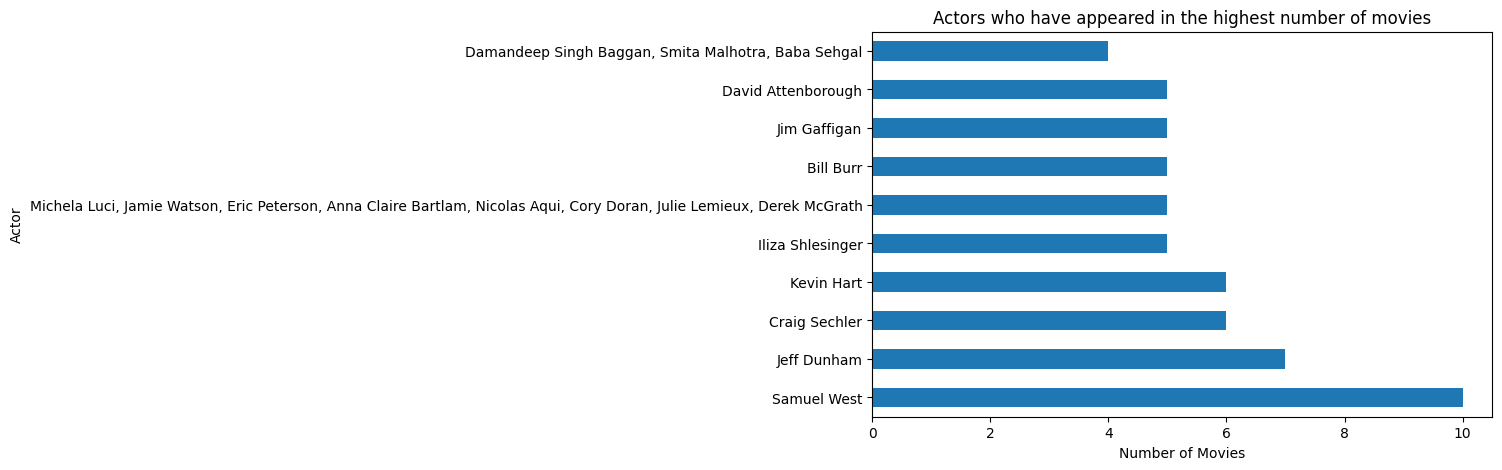

In [119]:
# Chart - 5 visualization code
# Top actors for movies
# Filter movies with known cast
movies_with_known_cast = df[(df['cast'] != 'unknown') & (df['type'] == 'Movie')]


# Get value counts of actors and select top 10
top_actors = movies_with_known_cast['cast'].value_counts().nlargest(10)


# Plot horizontal bar chart
plt.figure(figsize=(8, 5))
top_actors.plot(kind='barh')
plt.title('Actors who have appeared in the highest number of movies')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here:-A bar plot is a type of graphical representation that uses bars to show the relative size of different categories. The bars are typically vertical, but they can also be horizontal. The height or length of each bar is proportional to the value it represents.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:-The insights gained from the chart are as follows:

Samuel West has appeared in the highest number of movies, with a count of 10. This indicates his significant presence and involvement in the film industry, showcasing his prolific career and potential popularity among viewers.

Following closely, Jeff Dunham has appeared in 7 movies, making him the second-highest in terms of movie appearances. This suggests his notable contributions to the film industry and his ability to engage audiences with his performances.

Craig Sechler ranks third with 6 movies, showcasing his considerable presence and impact within the movie landscape. His multiple appearances demonstrate his consistent involvement in the film industry and the recognition he has received for his work.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:-The gained insights regarding the actors and their movie counts can potentially help create a positive business impact. Here's an assessment of their potential impact:

* Positive Business Impact:

  The insight that certain actors, such as Samuel West, Jeff Dunham, and Craig Sechler, have appeared in multiple movies suggests their popularity and potential appeal among viewers. This knowledge can be leveraged by businesses to attract audiences, target specific demographics, and potentially increase viewership and revenue.

  By recognizing the actors with the highest movie counts, businesses can strategize collaborations, content acquisitions, or marketing initiatives centered around these actors. Utilizing their popularity and recognition can help businesses attract a larger audience and contribute to positive business outcomes.

* Potential negative growth considerations include over-reliance on a few actors, which can lead to content saturation and audience fatigue. Neglecting market trends and audience preferences may also result in declining viewership. To mitigate these risks, businesses should diversify the talent pool, stay attuned to audience needs, and prioritize variety and creativity.

#### Chart - 6

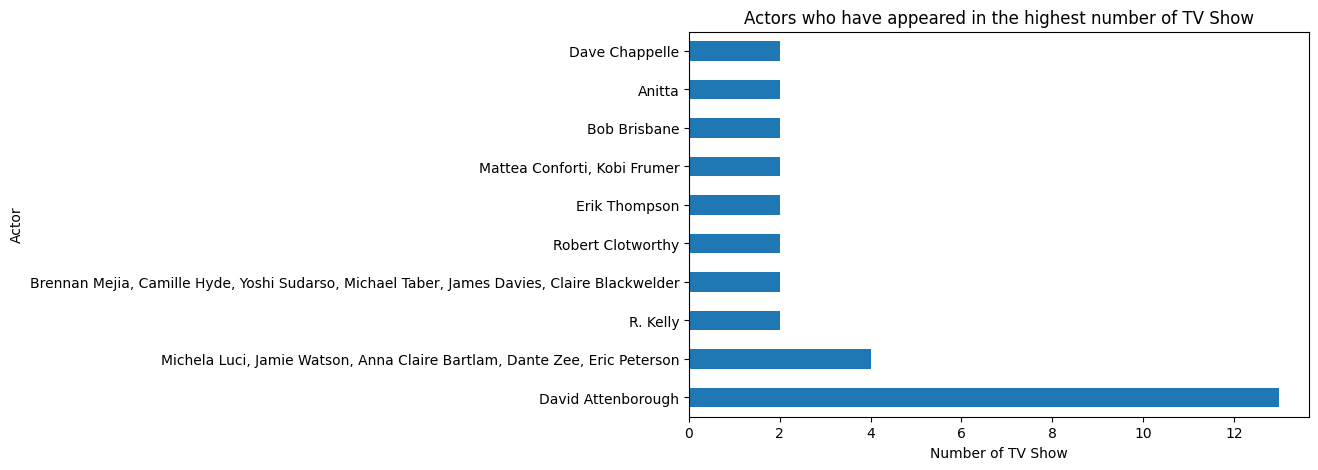

In [120]:
# Chart - 6 visualization code
# Top actors for TV Show
# Filter TV Show with known cast
TV_Show_with_known_cast = df[(df['cast'] != 'unknown') & (df['type'] == 'TV Show')]


# Get value counts of actors and select top 10
top_actors = TV_Show_with_known_cast['cast'].value_counts().nlargest(10)


# Plot horizontal bar chart
plt.figure(figsize=(8, 5))
top_actors.plot(kind='barh')
plt.title('Actors who have appeared in the highest number of TV Show')
plt.xlabel('Number of TV Show')
plt.ylabel('Actor')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here:-A bar plot is a type of graphical representation that uses bars to show the relative size of different categories. The bars are typically vertical, but they can also be horizontal. The height or length of each bar is proportional to the value it represents.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:-David Attenborough has the highest number of TV show appearances on Netflix, with a record-breaking count of 13. This signifies his significant involvement and popularity in the streaming platform's content, highlighting his influence and appeal to viewers.

Additionally, Michela Luci, Jamie Watson, Anna Claire Bartlam, Dante Zee, and Eric Peterson stand out as actors who have appeared in 4 TV shows, ranking second in terms of the most TV show appearances among all actors. Their multiple appearances suggest a consistent presence and recognition within Netflix's TV show offerings.

These insights emphasize the prominence of David Attenborough and the group of actors who have made multiple appearances in Netflix TV shows. Their frequent presence suggests a strong following and viewer interest, showcasing their contribution to the platform's content offerings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:-The gained insights about the actors and their TV show appearances on Netflix can potentially have a positive business impact. Here's an assessment of their potential impact:

Positive Business Impact:

The insight that David Attenborough has the highest number of TV show appearances on Netflix highlights his significant popularity and influence. Businesses can leverage his appeal to attract a larger audience, potentially increasing viewership and generating positive business outcomes.

The group of actors with 4 TV show appearances, including Michela Luci, Jamie Watson, Anna Claire Bartlam, Dante Zee, and Eric Peterson, demonstrates their consistent presence and recognition. This knowledge can guide businesses in identifying actors with a strong following, allowing them to strategize collaborations, acquisitions, or marketing initiatives to target specific demographics and drive positive business impact.

Negative Growth Considerations:
There are no direct insights that would lead to negative growth. However, it's important to consider potential risks:

Over-reliance on a few actors: Depending heavily on a limited group of actors may result in a lack of variety and fresh talent. Over-reliance on specific actors without exploring a broader talent pool can limit creativity, diversity, and audience appeal.

#### Chart - 7

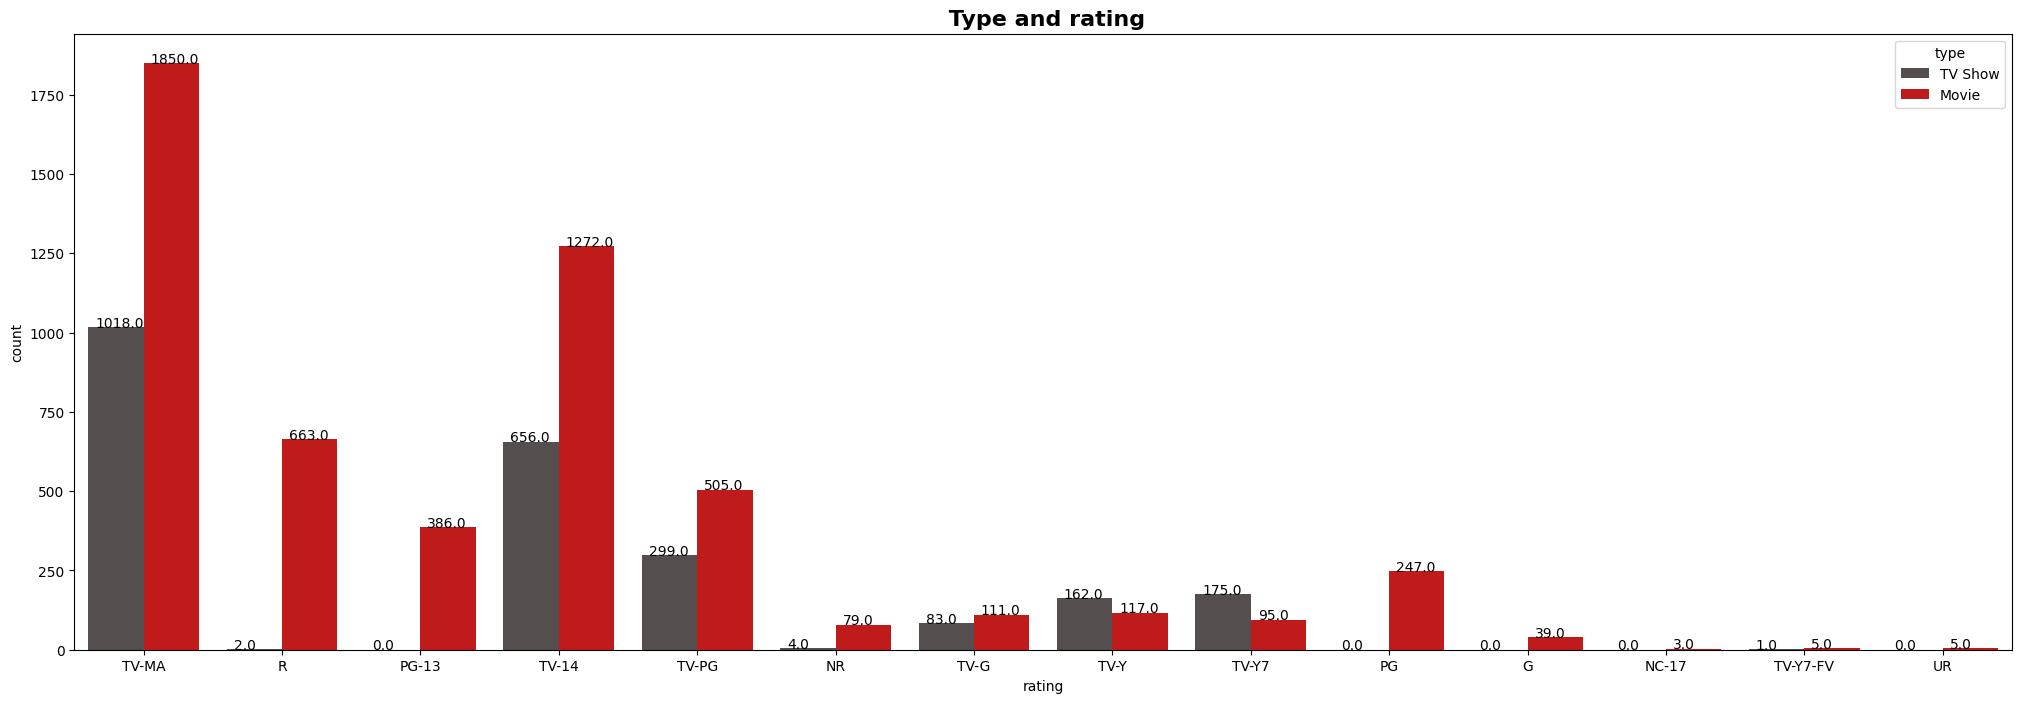

In [121]:
# Chart - 7 visualization code
plt.figure(figsize=(25,8))
ax = sns.countplot(x='rating',hue='type',data=df,palette=['#564d4d','#db0000'], )
plt.title(' Type and rating',size='16',fontweight="bold")

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+0.01))
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here:-
A countplot is a statistical plot that shows the count of observations in each categorical bin using bars. It is similar to a histogram, but instead of showing the distribution of a quantitative variable, it shows the distribution of a categorical variable.Countplots are used to visualize the frequency of different categories in a dataset. They can be used to compare the frequencies of different categories, or to identify the most common category.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:- The insights gained from the count plot are as follows:

The TV-MA rating has the highest number of rating counts for both movies and TV shows. It appears 1850 times for movies and 1018 times for TV shows. This indicates that content with a TV-MA rating is in high demand and is being produced and consumed frequently on the platform.

The TV-14 rating is the second-highest in terms of rating counts. It appears 1272 times for movies and 656 times for TV shows. This suggests that content with a TV-14 rating also has a significant presence and popularity among viewers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:-The gained insights from the count plot have the potential to create a positive business impact. Here's an assessment of their potential impact:

Positive Business Impact:

The observation that TV-MA has the highest count of ratings for both movies and TV shows suggests a strong demand and popularity for content with this rating. This insight can guide businesses to prioritize and invest in producing or acquiring TV-MA content, which aligns with viewer preferences and has the potential to attract a larger audience.

Additionally, the recognition of TV-14 as the second-highest rating count indicates its significant presence and appeal among viewers. Businesses can leverage this insight to cater to the audience who prefers content with a TV-14 rating, potentially increasing viewership and engagement by offering more of such content.

Negative Growth Considerations:
While the count plot insights themselves do not lead to negative growth, it's important to approach them with caution and consider potential risks:

Overreliance on specific ratings, such as TV-MA and TV-14, without diversifying content offerings, may lead to limited audience reach and potential stagnation. Neglecting other ratings and genres that could appeal to different segments of viewers may result in missed growth opportunities.

#### Chart - 8

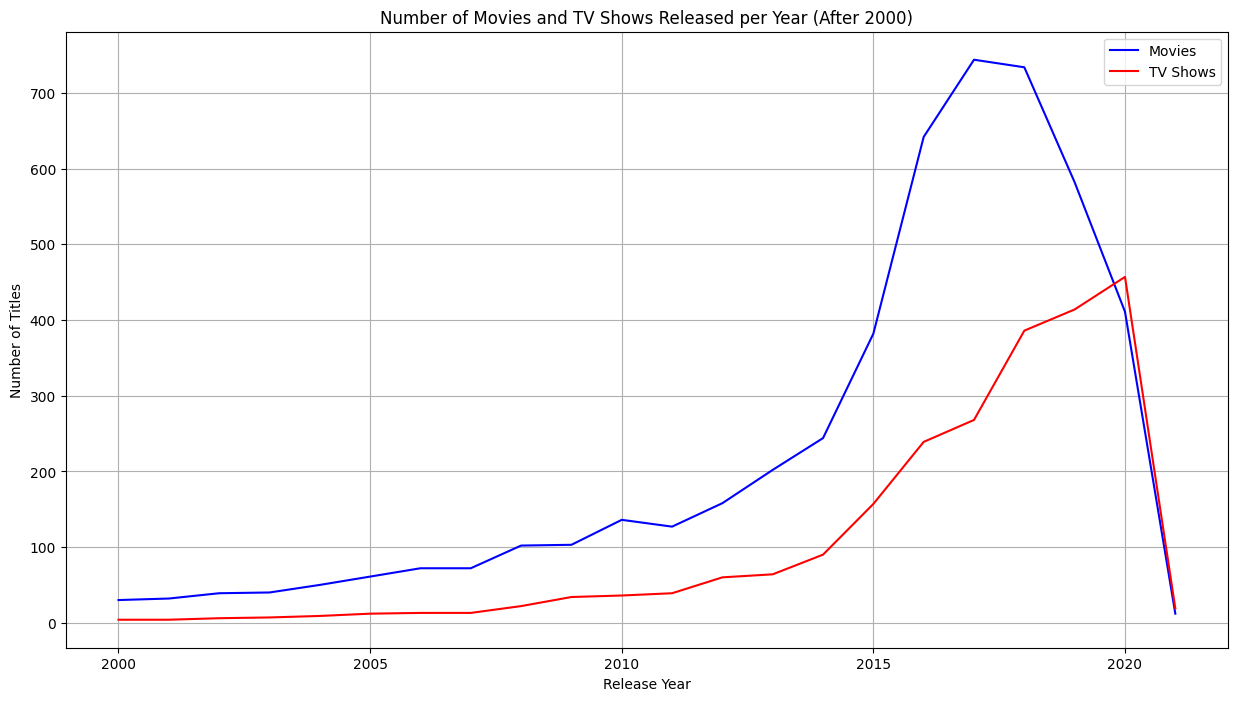

In [122]:
# Chart - 8 visualization code
# Filter movie and TV show data after 2000
movies_data = df[(df['type'] == 'Movie') & (df['release_year'] >= 2000)]
tv_shows_data = df[(df['type'] == 'TV Show') & (df['release_year'] >= 2000)]


# Calculate movie and TV show counts by release year
movie_counts_by_year = movies_data['release_year'].value_counts().sort_index()
tv_show_counts_by_year = tv_shows_data['release_year'].value_counts().sort_index()


# Plot line plots
plt.figure(figsize=(15, 8))
plt.plot(movie_counts_by_year.index, movie_counts_by_year.values, linestyle='-', color='blue', label='Movies')
plt.plot(tv_show_counts_by_year.index, tv_show_counts_by_year.values, linestyle='-', color='red', label='TV Shows')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Number of Movies and TV Shows Released per Year (After 2000)')
plt.legend()
plt.grid(True)
plt.show()



##### 1. Why did you pick the specific chart?

Answer Here:-Line plots are a simple and effective way to visualize data, and they are often used to show trends over time, compare different groups of data, or identify relationships between variables.
The variables are typically plotted on the x-axis and y-axis, and the line plot shows how the value of one variable changes as the value of the other variable changes.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:-The analysis of the number of movies released per year reveals an overall upward trend from 2000 to 2017, reaching its peak with over 700 movies released in 2017. However, the trend takes a turn after 2017, showing a gradual decline in movie releases, with a significant drop observed in 2021. This pattern suggests a potential shift or transformation in the movie industry landscape, with a possible impact on movie production and distribution.

On the other hand, the count of TV shows released per year presents a consistent and steady growth pattern throughout the years. The number of TV shows has been steadily increasing, experiencing a notable rise from over 150 shows in 2015 to more than 450 shows in 2020. This consistent growth indicates a growing popularity and demand for TV series content, reflecting viewers' preferences for episodic storytelling and binge-watching experiences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:-
The gained insights about the trends in movie and TV show releases can potentially help create a positive business impact. Here's an assessment of their potential impact:

Positive Business Impact:

The upward trend in the number of movies released per year until 2017 suggests a period of growth and potential opportunities for businesses in the movie industry. By understanding this trend, businesses can capitalize on the periods of higher movie releases to strategize marketing efforts, secure distribution deals, and attract audiences, leading to positive business outcomes.

The consistent growth in the count of TV shows released per year indicates a rising demand for TV series content. Businesses can leverage this trend to invest in TV show production, explore new storytelling formats, and build strong and loyal viewer bases, which can contribute to increased viewership and positive business impact.

Negative Growth Considerations:
While the insights do not directly lead to negative growth, there are potential risks to consider:

The decline in movie releases after 2017 could signal challenges or changes in the movie industry landscape. Businesses need to stay vigilant and adapt their strategies to address factors that may be contributing to the decline, such as changing viewer preferences, competition from streaming platforms, or shifts in market dynamics.

The continuous growth in TV show releases may lead to saturation and increased competition in the TV series market. Businesses should be mindful of maintaining the quality and uniqueness of their TV show offerings to avoid potential viewer fatigue and ensure sustained positive growth.

To achieve positive business impact, companies should use the gained insights as part of a comprehensive strategy that considers market trends, viewer preferences, and industry dynamics. By proactively adapting to changes and seizing opportunities, businesses can navigate potential challenges and foster sustained growth.

#### Chart - 9

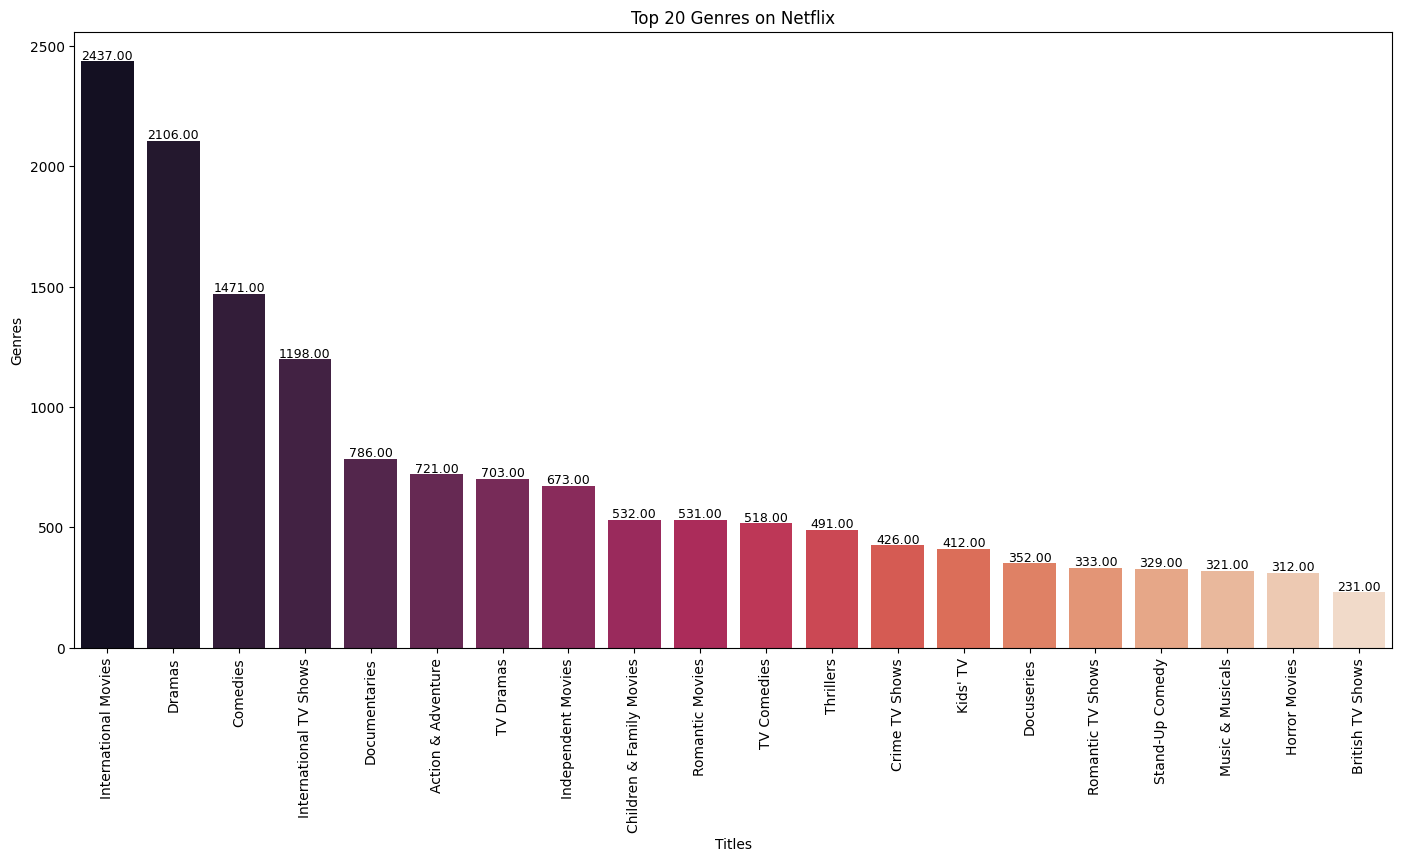

In [123]:
# Chart - 9 visualization code
filtered_genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(17,8))
g = sns.countplot(x = filtered_genres,palette="rocket" ,order=filtered_genres.value_counts().index[:20])
plt.xticks(rotation = 90)
for bar in g.patches:
    g.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 4),
                   textcoords='offset points')
plt.title('Top 20 Genres on Netflix',)
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here:-A countplot is a statistical plot that shows the count of observations in each categorical bin using bars. It is similar to a histogram, but instead of showing the distribution of a quantitative variable, it shows the distribution of a categorical variable.Countplots are used to visualize the frequency of different categories in a dataset. They can be used to compare the frequencies of different categories, or to identify the most common category.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:-
The analysis reveals that international movies have the highest genre count, with a total of 2437 genres identified. The second-highest count is for dramas, with 2106 genres, and the third-highest count is for comedies, with 1471 genres. The pattern continues for other genres in descending order.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:-
The insights that you have provided can help create a positive business impact in a number of ways.

Increased audience reach: The high number of international movies suggests that there is a demand for these types of movies from a global audience. By producing more international movies, studios can reach a wider audience and increase their revenue.
Differentiation from the competition: The high number of dramas and comedies suggests that these genres are already well-saturated. By producing more international movies, studios can differentiate themselves from their competitors and attract a unique audience.
Cultural awareness: International movies can help to promote cultural awareness and understanding. By exposing audiences to different cultures, studios can help to break down stereotypes and promote tolerance.
However, there are also some insights that could lead to negative growth.

Lack of familiarity: The high number of international movies could also lead to a lack of familiarity among audiences. If audiences are not familiar with the cultures or languages of the movies, they may be less likely to watch them.
Increased production costs: Producing international movies can be more expensive than producing movies in a domestic market. This is because studios may need to hire foreign actors, crew, and locations.
Distribution challenges: Distributing international movies can be challenging. Studios may need to find distributors in different countries, and they may need to adapt the movies to different cultures.

#### Chart - 10

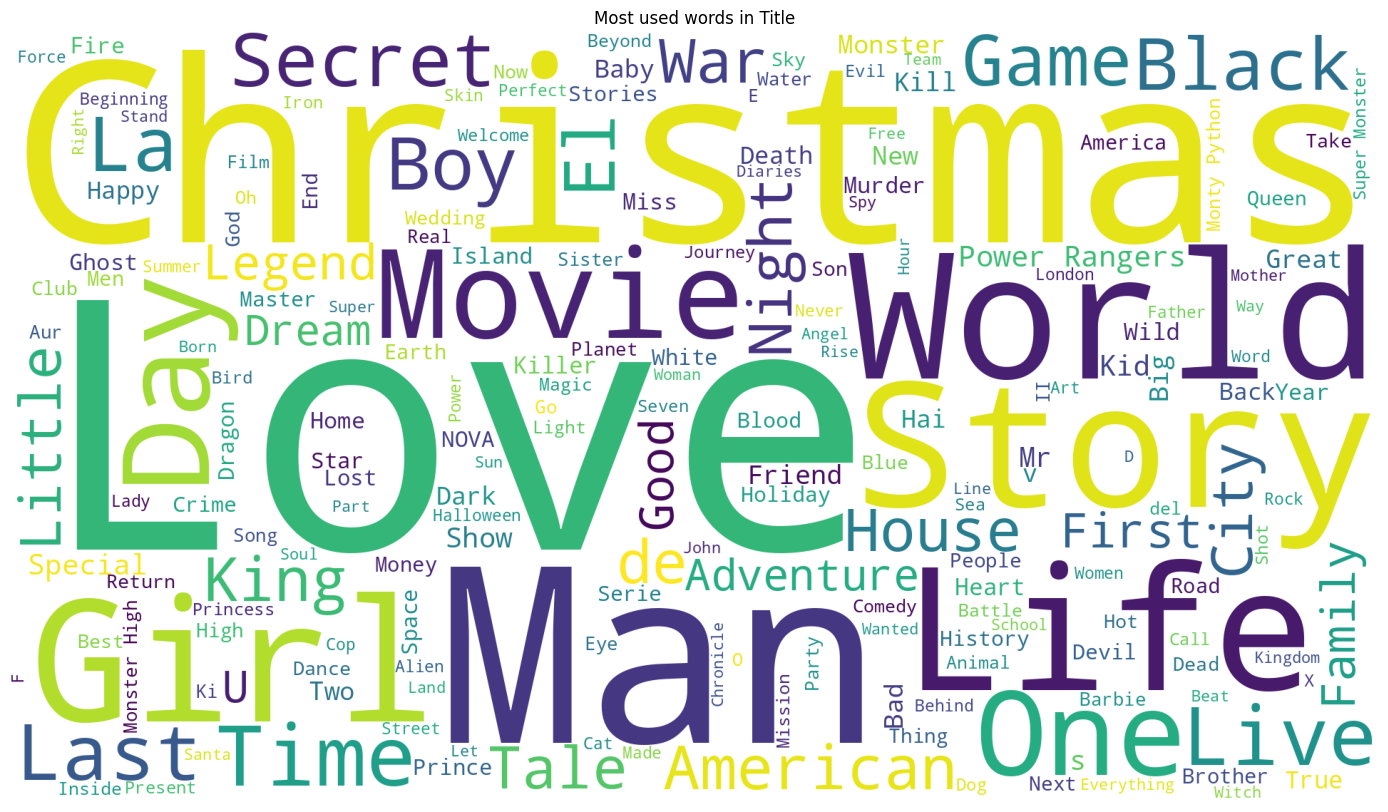

In [124]:
# Chart - 10 visualization code
#removal of stop words
stopwords = set(STOPWORDS)

plt.subplots(figsize=(25,10))
wordcloud = WordCloud(
                          background_color='white',stopwords=stopwords,
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.title))
plt.title('Most used words in Title')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here:-A word cloud is a graphical representation of text data, in which the size of each word corresponds to its frequency or importance. The words are typically drawn in a random order, and the font size of each word is proportional to its frequency. This makes it easy to see which words are the most common in a text, and to get a general sense of the topic of the text.

Word clouds are often used in marketing and advertising to visualize the keywords that are most relevant to a product or service. They can also be used in research to identify the most common themes in a body of text.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:-The insights gained from the word cloud analysis are as follows:

Love Story: The word "Love Story" appears frequently in the word cloud, indicating that movies or content related to romance and love stories are prevalent. This insight suggests that romantic themes are popular among viewers and may hold a significant share of the content on the platform.

World and Christmas: The words "World" and "Christmas" are also prominent in the word cloud. This suggests that movies with global or worldly themes, as well as content related to the Christmas holiday, have a notable presence in the platform's offerings. These themes might resonate with a diverse audience, reflecting the platform's efforts to cater to viewers with various interests and cultural backgrounds.

Man and Life: The words "Man" and "Life" are recurring in the word cloud, possibly representing movies with themes centered around human experiences, struggles, and emotions. This insight indicates that content with relatable and human-centric storytelling holds significance and attracts viewers seeking emotional and thought-provoking narratives.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:-The gained insights from the word cloud analysis can potentially help create a positive business impact. Here's an assessment of their potential impact:

Positive Business Impact:

Love Story and Romance Themes: The prominence of "Love Story" in the word cloud suggests a high demand for romantic-themed content among viewers. Understanding this preference can enable businesses to focus on producing or acquiring more love story-based movies or shows, which can attract a sizable and engaged audience, leading to positive business outcomes.

World and Christmas Themes: The frequent appearance of "World" and "Christmas" indicates a significant interest in movies or content with global and festive themes. Businesses can capitalize on this insight by curating content that caters to viewers' diverse cultural backgrounds and seasonal preferences, potentially expanding the platform's audience base and generating positive user engagement.

Negative Growth Considerations:
The word cloud analysis does not directly lead to negative growth. However, there are some potential considerations:

Overemphasis on Specific Themes: While the identified themes are popular, overemphasizing these themes might lead to a lack of content diversity. Neglecting other genres or themes that have potential audience appeal may result in limited growth opportunities and potential viewer disengagement.

Ignoring Emerging Trends: Relying solely on the identified themes may lead to missing out on emerging content trends. Businesses should continuously monitor viewer preferences and stay updated with industry developments to remain adaptable and responsive to changing audience interests.

To ensure sustained positive business impact, companies should use the gained insights as part of a comprehensive content strategy. This strategy should consider a balanced mix of popular themes and genres, along with room for experimentation and innovation. By providing a diverse range of content that meets varying viewer preferences, businesses can foster positive growth and viewer satisfaction

#### Chart - 11

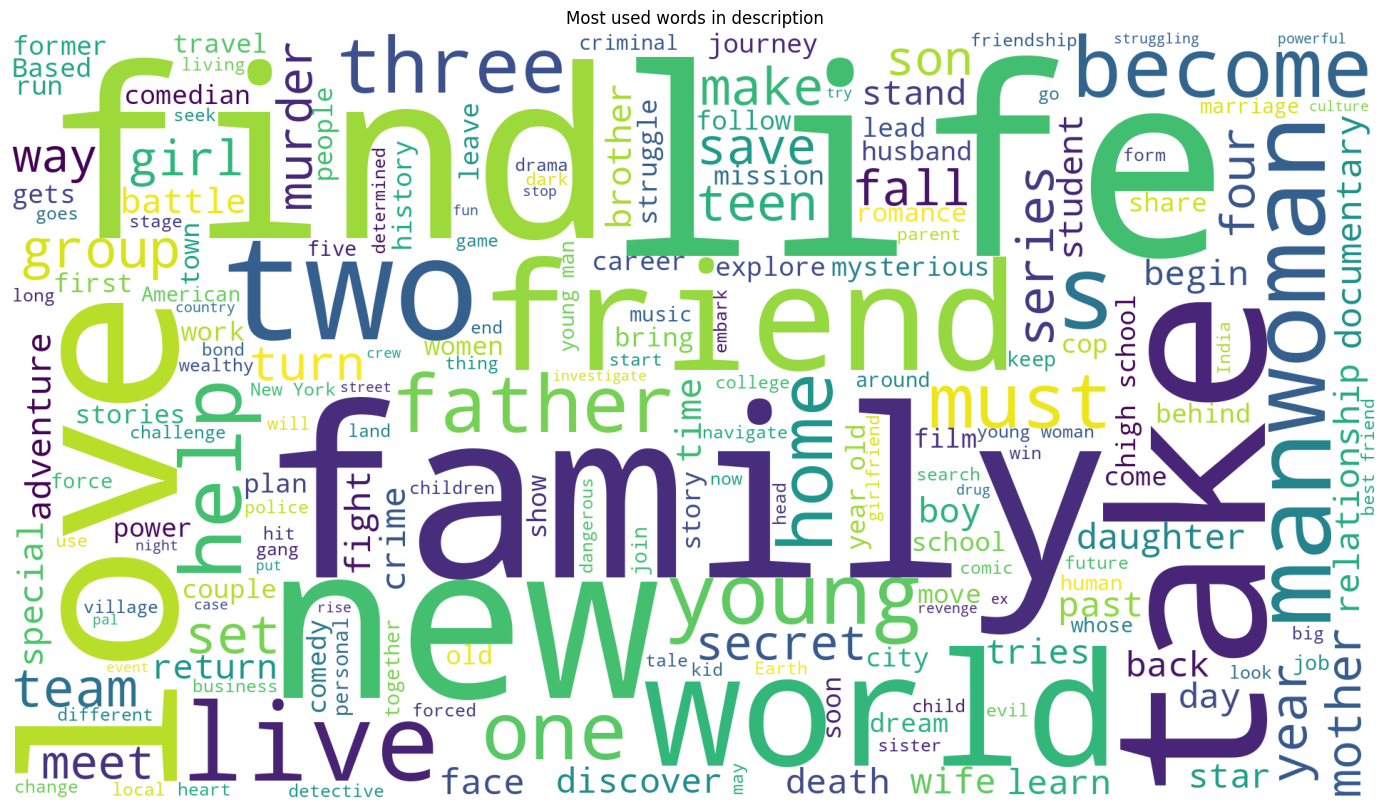

In [125]:
# Chart - 11 visualization code
#removal of stop words
stopwords = set(STOPWORDS)

plt.subplots(figsize=(25,10))
wordcloud = WordCloud(
                          background_color='white',stopwords=stopwords,
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.description))
plt.title('Most used words in description')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here:-A word cloud is a graphical representation of text data, in which the size of each word corresponds to its frequency or importance. The words are typically drawn in a random order, and the font size of each word is proportional to its frequency. This makes it easy to see which words are the most common in a text, and to get a general sense of the topic of the text.

Word clouds are often used in marketing and advertising to visualize the keywords that are most relevant to a product or service. They can also be used in research to identify the most common themes in a body of text.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:--
The insights gained from the word cloud analysis of the most used words in the descriptions are as follows:

Friend, Life, Family: The words "Friend," "Life," and "Family" are among the most prominent words in the word cloud. This indicates that content on the platform often revolves around themes of friendship, family dynamics, and human experiences. Viewers may find movies or shows with relatable and heartfelt stories of interpersonal relationships particularly appealing.

New and Love: The words "New" and "Love" are also significant in the word cloud. This suggests that content frequently explores themes of new beginnings, personal growth, and love. Movies or shows that focus on these themes can evoke strong emotional connections with the audience, potentially enhancing viewer engagement.

Find: The word "Find" is notable in the word cloud, indicating that content often involves characters seeking something meaningful or embarking on journeys of self-discovery. Such themes of self-exploration and personal growth can resonate with viewers, making the content compelling and thought-provoking.

Overall, the word cloud analysis provides valuable insights into the prevalent themes and topics in the descriptions of the content available on the platform

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:-The gained insights from the word cloud analysis can potentially help create a positive business impact. Here's an assessment of their potential impact:

Positive Business Impact:

Emphasis on Relatable Themes: The prominence of words like "Friend," "Life," "Family," "New," "Love," and "Find" in the word cloud indicates that content with relatable and emotionally resonant themes is prevalent. Businesses can use this insight to create or acquire content that taps into these universal human experiences, fostering strong connections with the audience and driving positive engagement.

Emotional Storytelling: Themes like "Love," "Family," and "Find" suggest a focus on emotional storytelling. By highlighting content that evokes empathy, excitement, and introspection, businesses can enhance viewer satisfaction and build a loyal audience base.

Negative Growth Considerations:
The word cloud analysis does not directly lead to negative growth. However, there are some potential considerations:

Overdependence on Specific Themes: While the identified themes are popular, overemphasizing them might lead to content homogeneity. Neglecting other genres or diverse storytelling approaches may limit audience reach and growth opportunities.

Neglecting Market Trends: Relying solely on the identified themes could result in overlooking emerging market trends. Businesses should stay attuned to shifting audience preferences and industry developments to remain innovative and relevant.

To ensure sustained positive business impact, companies should use the gained insights as part of a comprehensive content strategy. This strategy should strike a balance between popular themes and diversity, embracing various genres and fresh storytelling approaches.

#### Chart - 12

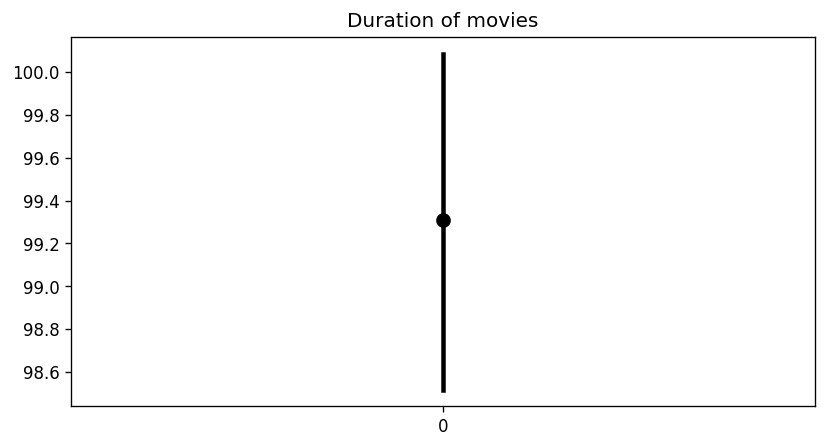

In [126]:
# Chart - 12 visualization code
plt.figure(figsize=(8,4), dpi=120)
sns.pointplot(data=movies_duration['duration'], color='black')
plt.title('Duration of movies')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here:-
A point plot is a type of statistical visualization that displays data points as individual markers along a single axis to represent different data categories or groups. It is used to compare and visualize the central tendency (usually mean or median) and the variability of numerical data across different categories.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:- The insight gained from the plot is as follows:

The average duration of movies in the given dataset is approximately 99.3 minutes. This information provides an understanding of the typical length of movies available on the platform or included in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:-The gained insight about the average duration of movies can potentially help create a positive business impact. Here's how:

Positive Business Impact:

Content Curation: Knowing the average duration of movies allows platform managers to curate a well-balanced content library with a mix of shorter and longer films. By offering a diverse selection, the platform can cater to a broader audience with varied preferences, potentially increasing user satisfaction and engagement.

Viewer Preferences: Understanding the typical movie length helps content creators align their productions with viewer preferences. By producing movies that match the average duration or cater to specific time preferences, filmmakers can attract a larger audience and increase the likelihood of positive viewer feedback.

Negative Growth Considerations:
The insight about the average movie duration is unlikely to lead to negative growth. However, there are some potential considerations:

Overemphasis on Average Duration: Overemphasis on the average duration might limit content diversity and creativity. If the platform focuses solely on movies with lengths close to the average, it may miss opportunities to offer unique and innovative films that could attract niche audiences.

Ignoring Audience Preferences: While the average duration provides valuable information, it is essential to consider individual viewer preferences. Relying solely on the average might neglect specific segments of the audience who have different time preferences for movie-watching.
To ensure sustained positive business impact, companies should use the gained insight as part of a comprehensive content strategy. This strategy should balance content curation, viewer preferences, and user experience while being open to creative and unique content offerings.

#### Chart - 13

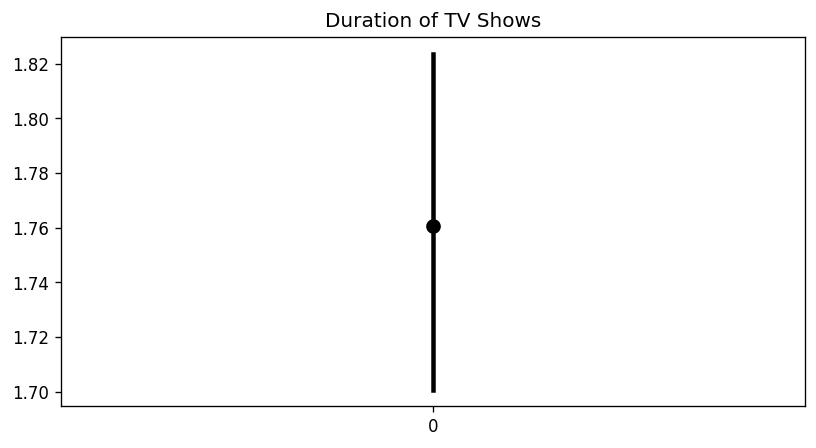

In [127]:
# Chart - 13 visualization code
plt.figure(figsize=(8,4), dpi=120)
sns.pointplot(data=tv_shows_duration['duration'], color='black')
plt.title('Duration of TV Shows')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here:-A point plot is a type of statistical visualization that displays data points as individual markers along a single axis to represent different data categories or groups. It is used to compare and visualize the central tendency (usually mean or median) and the variability of numerical data across different categories.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:- The insight gained from the plot is as follows:

The average duration of TV shows in the given dataset is approximately 1.76 minutes. This information provides an understanding of the typical length of TV shows available on the platform or included in the dataset.

Knowing the average duration of TV shows can be valuable for both content creators and platform managers. It can help them make informed decisions about the content library, content production, and content acquisition.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:-The gained insight about the average duration of TV shows can potentially help create a positive business impact. Here's how:

Positive Business Impact:

Content Curation: Understanding the average duration of TV shows allows platform managers to curate a well-balanced content library with a mix of shorter and longer series. By offering a diverse selection, the platform can cater to a broader audience with varied preferences, potentially increasing user satisfaction and engagement.

Viewer Preferences: Knowing the typical TV show length helps content creators align their productions with viewer preferences. By producing TV shows that match the average duration or cater to specific time preferences, content creators can attract a larger audience and increase the likelihood of positive viewer feedback.

Negative Growth Considerations:
The insight about the average TV show duration is unlikely to lead to negative growth. However, there are some potential considerations:

Ignoring Audience Preferences: While the average duration provides valuable information, it is essential to consider individual viewer preferences. Relying solely on the average might neglect specific segments of the audience who have different time preferences for TV show-watching.

Content Quality: While considering the average duration, content creators and platform managers should also prioritize content quality. Length should not compromise the storytelling or production value of TV shows. Focusing solely on meeting the average duration might lead to rushed or incomplete storylines, negatively affecting viewer satisfaction.

To ensure sustained positive business impact, companies should use the gained insight as part of a comprehensive content strategy.

#### Chart - 14 - Correlation Heatmap

<ipython-input-128-3ae6c1204597>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),ax = ax, annot=True, cmap = 'viridis', linewidths = 1)


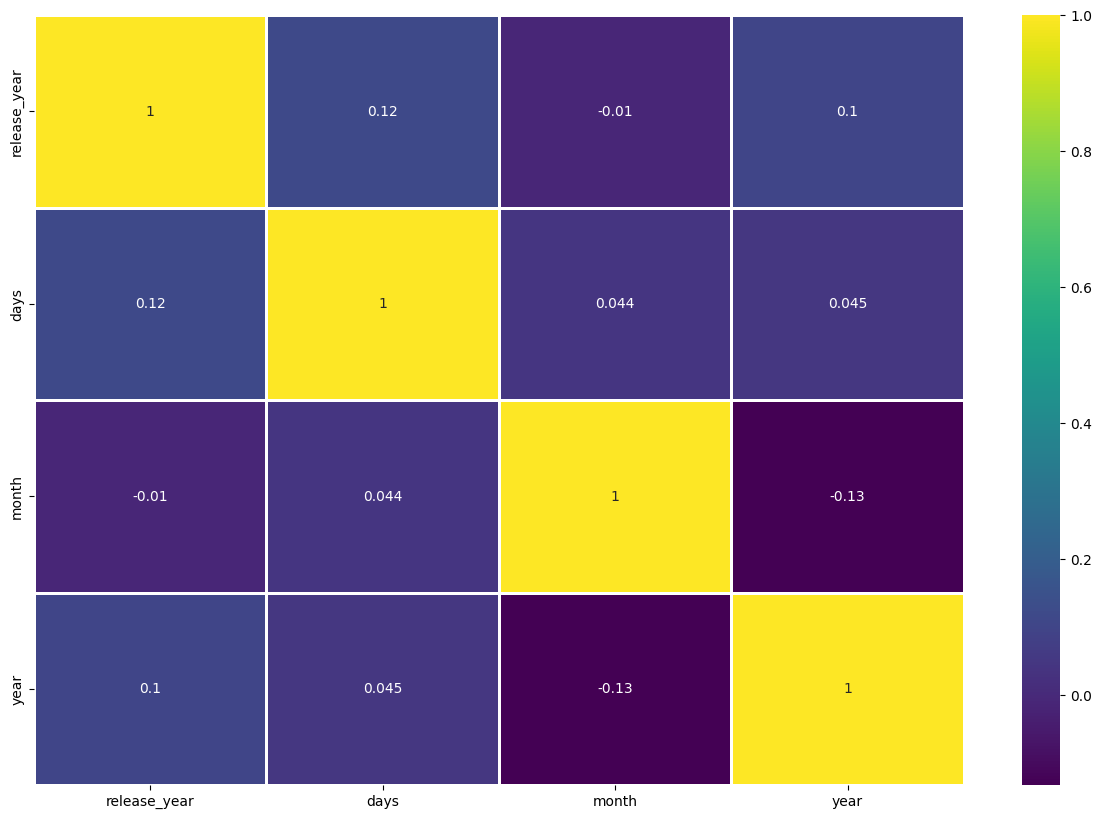

In [128]:
# Correlation Heatmap visualization code
f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(df.corr(),ax = ax, annot=True, cmap = 'viridis', linewidths = 1)

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here:-A correlation heat map is a graphical representation that visually displays the correlations between different variables in a dataset. It uses color-coding to indicate the strength and direction of the relationships between variables.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:-From the above correlation heatmap we can clearly see that the data is evenly distributed.


#### Chart - 15 - Pair Plot

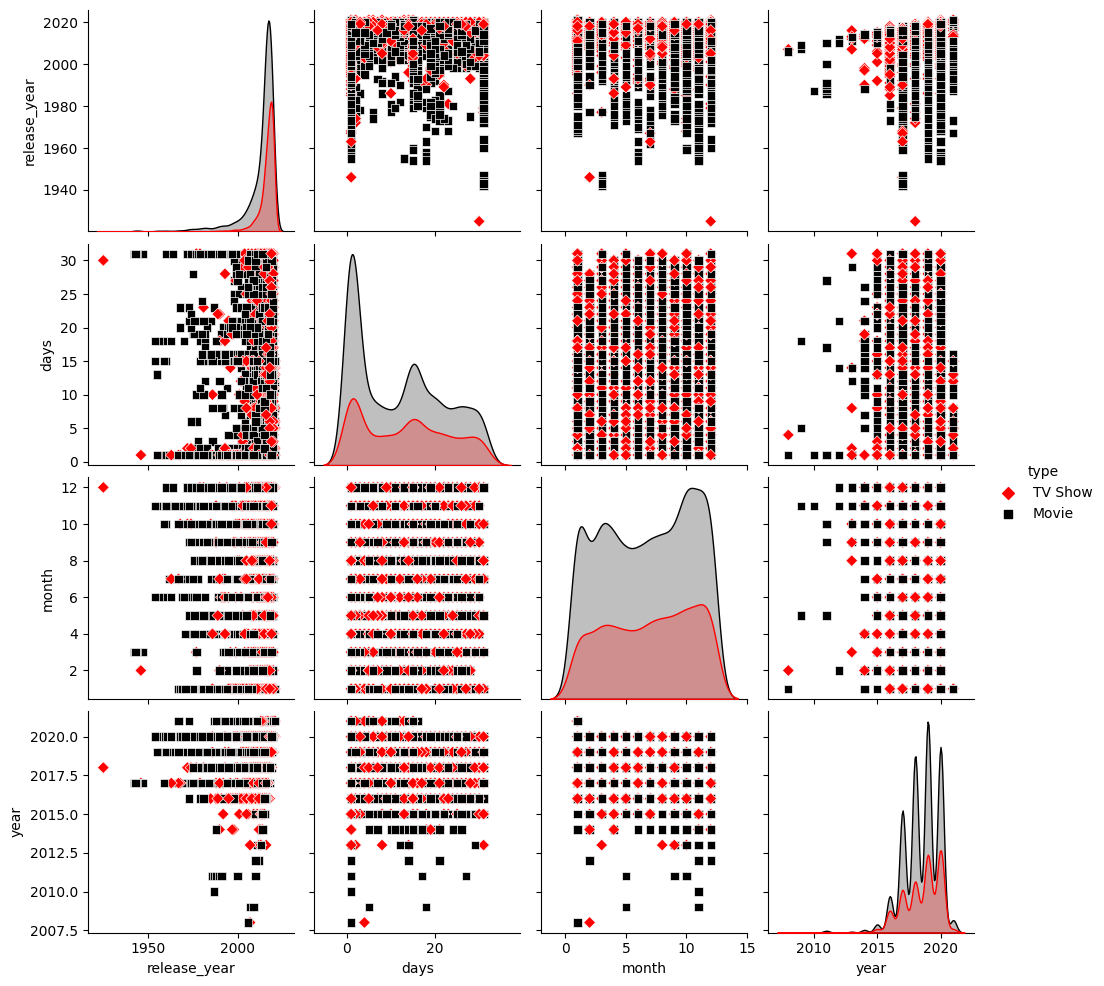

In [129]:
# Pair Plot visualization code
sns.pairplot(df,hue = 'type', markers=["D","s"],palette=('red','black'))

##### 1. Why did you pick the specific chart?

Answer Here:-A pairplot is a grid of plots, with each plot showing the relationship between two variables. The variables are typically plotted on the x-axis and y-axis of the plot. The color of the points in the plot can be used to represent a third variable.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:-The insight gained from the pair plot analysis is as follows:

The distribution of movies is more impactful than TV shows according to the dataset given. Specifically, the pair plot visually demonstrates that movies are more downloaded compared to TV shows. This conclusion is drawn from the visualization of the data points, which show a higher concentration and spread of movie-related data compared to TV show-related data.

This insight suggests that movies are more popular and preferred by the audience over TV shows in terms of download frequency. The higher number of downloads for movies may indicate a stronger demand for movie content on the platform or a greater appeal of movies to the viewers.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis(H0):-There is not any significant difference between the average duration of movies and tv Shows on netflix.

Alternative Hypothesis(H1):-There is any significant difference between the average duration of movies and tv Shows on netflix.

#### 2. Perform an appropriate statistical test.

In [130]:
from numpy.ma.core import equal
# Perform Statistical Test to obtain P-Value
from scipy import stats

#Extract the relevent columns: 'duration' and 'tyoe'
movies_duration = df[df['type']=='Movie']['duration']
tv_shows_duration = df[df['type']=='TV Show']['duration']

#Preprocess the 'duration' column
movies_duration = movies_duration.str.extract('(\d+)').astype(float)
tv_shows_duration = tv_shows_duration.str.extract('(\d+)').astype(float)

# performing the t-test
t_statistic,p_value = stats.ttest_ind(movies_duration,tv_shows_duration, equal_var=False, nan_policy='omit')

#Print the Values
print("T-Statistic:", t_statistic)
print("P-value", p_value)

T-Statistic: [249.87262245]
P-value [0.]


##### Which statistical test have you done to obtain P-Value?

Answer Here:-The statistical test that i have used it to obtain the  P-values is the independent two-sample t-test(Stats.ttest_ind()) from the Scipy library.
This test is commonly used to compare the means of two independent group to determine if there is a significant difference between them.

##### Why did you choose the specific statistical test?

Answer Here:-The Independent two sample t-test was chossen because we are comparing the means of two independent groups movies and TV Shows.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here:-

Null Hypothesis(H0):-There is no significant difference in the average duration between movies released in the United States and movies released in the United Kingdom.
Alternate Hypothesis(H1):- There is a significant difference in the average duration between movies released in the United States and the movies released in the united kingdom.

#### 2. Perform an appropriate statistical test.

In [131]:
# Perform Statistical Test to obtain P-Value
from scipy import stats

#Extract the relevant columns: 'duration' and 'country'
duration_usa = df[(df['type'] == 'Movie')&(df['country']=='United States')]['duration']
duration_uk = df[(df['type'] == 'Movie')&(df['country'] =='United Kingdom')]['duration']

#Preprocess the 'duration' column
duration_usa = duration_usa.str.extract('(\d+)').astype(float)
duration_uk = duration_uk.str.extract('(\d+)').astype(float)

#Perform the t-test
t_statistic, p_value = stats.ttest_ind(duration_usa, duration_uk, equal_var=False,nan_policy= 'omit')

# Print the results
print("T-Statistic:",t_statistic)
print("P-value",p_value)

T-Statistic: [-2.26674952]
P-value [0.02388009]


##### Which statistical test have you done to obtain P-Value?

Answer Here:-I have used independent two sample t-test to obtain the p-value. the t-test is used to determine whether there is a significant differece in the average duration between  movies released in the united states and movies released in the united kingdom.

##### Why did you choose the specific statistical test?

Answer Here:-The independent two sample t-test is a suitable choice for comparing the average duration of the movies released in the ubited states and the united kingdom. it allows us to determine whether there is a statistcally significant difference between the two groups based on the obtaied t-statistic and p-value.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here:-

Null Hypothesis(H0):-There is no significant difference in the average release year between Movies and TV shows on Netflix.

Alternative Hypothesis(H1):- There is a significant difference in the average release year between Movies and TV Shows on Netflix.

#### 2. Perform an appropriate statistical test.

In [132]:
# Perform Statistical Test to obtain P-Value
from scipy import stats

#Extract the relevant columns: 'release_year' and 'type'
release_year_movies = df[df['type']=='Movie']['release_year']
release_year_tv_shows = df[df['type']== 'TV Show']['release_year']

#Perform the t-test
t_statistic,p_value = stats.ttest_ind(release_year_movies,release_year_tv_shows,equal_var=False,nan_policy='omit')

#Print the results
print("T-Statistic:", t_statistic)
print("P-value:", p_value)

T-Statistic: -18.786223791998147
P-value: 6.472950595817385e-77


##### Which statistical test have you done to obtain P-Value?

Answer Here:- I have done the independent two-sample t-test to obtain the P-Value.

##### Why did you choose the specific statistical test?

Answer Here:-By using the independent two-sample t-test, we can evaluate whether the observed difference in the average release year between movies and TV shows is statistically significant or if it could be due to random chance.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [133]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
days            0
month           0
year            0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here:-There is no missing values presemt in the given data.

### 2. Handling Outliers

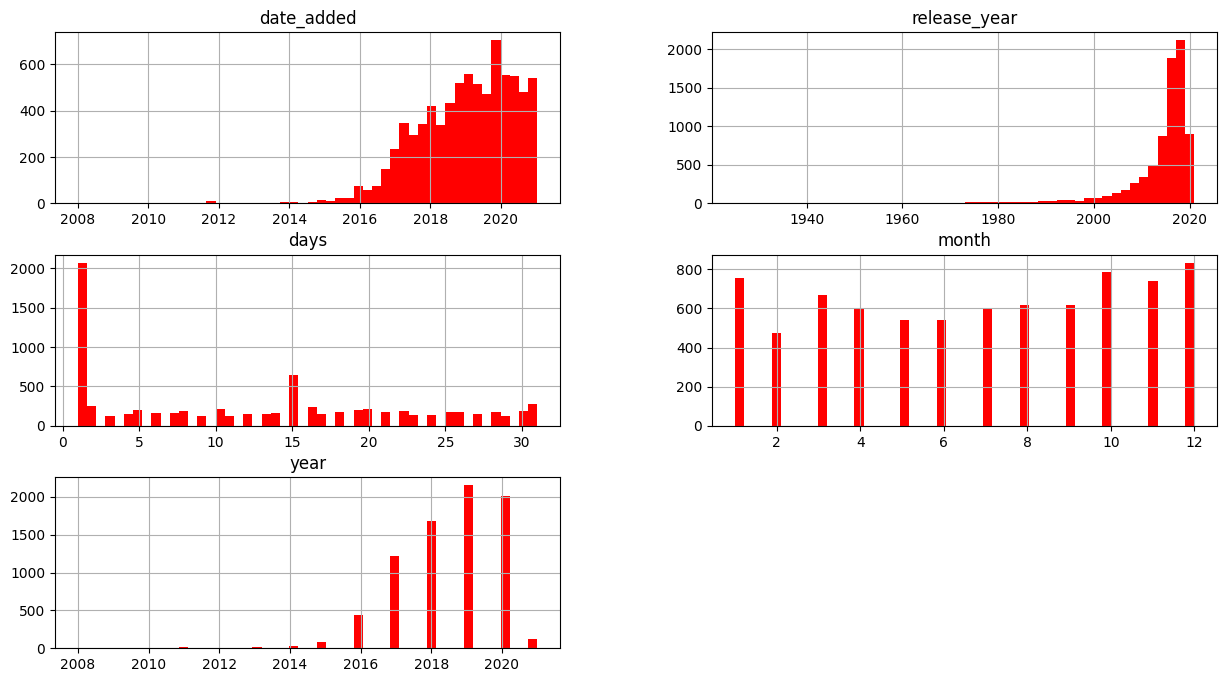

In [134]:
# Handling Outliers & Outlier treatments
df.hist(bins=50, figsize=(15,8),color = 'red')
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here:Most of the data is in taxtual format The textual format contains the data we need to build a cluster/building model. Therefore, there is no need to handle outliers.

### 3. Categorical Encoding

In [135]:
# Encode your categorical columns


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here:-AS we are working on discriptions and listed_in columns we dont require encoding here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [136]:
# Expand Contraction
!pip install contractions
import contractions

In [137]:
df['text_data'] = df['listed_in'] + df['description']

df['text_data'].sample(5)

3082    Comedies, International Movies, Music & Musica...
7775    Anime Series, Kids' TVA quest for freedom and ...
314     Action & Adventure, Dramas, Romantic MoviesA y...
4865    Dramas, Independent Movies, International Movi...
7168    Dramas, Independent Movies, International Movi...
Name: text_data, dtype: object

In [138]:
#Applying  contraction
df['description'] = df ['description'].apply(lambda x:contractions.fix(x))
df['listed_in'] =  df['listed_in'].apply(lambda x:contractions.fix(x))

In [139]:
df['text_data'].sample(5)

5236    Kids' TV, Korean TV ShowsWhen disaster strikes...
7108    Kids' TVIn his tiny meadow village, curious li...
1928    Dramas, International Movies, Romantic MoviesT...
1204    DocumentariesBased on economist Thomas Piketty...
7561    Dramas, ThrillersStruggling to survive alone p...
Name: text_data, dtype: object

#### 2. Lower Casing

In [140]:
# Lower Casing
df['text_data'] = df['text_data'].str.lower()

#### 3. Removing Punctuations

In [141]:
# Remove Punctuations
import string
def remove_punctuation(text):
  '''a function for removing punctuation'''
  translator = str.maketrans('','',string.punctuation)
  return text.translate(translator)

df['text_data'] = df['text_data'].apply(remove_punctuation)
df['text_data'].sample(5)

285     children  family movies comediestwo small abom...
5997    standup comedyshes halfway through her 20s — a...
2363    action  adventure dramas international moviesw...
32      dramas international movies romantic moviesas ...
2367    dramasdespite growing up with traits that set ...
Name: text_data, dtype: object

#### 4. Removing URLs & Removing words and digits contain digits.

In [142]:
# Remove URLs & Remove words and digits contain digits
import re

#Remove links
df['text_data'] = df['text_data'].apply(lambda x: re.sub(r"http\S+", "", x))

#Remove digits
df['text_data'] = df['text_data'].apply(lambda x: re.sub(r"\d+","",x))

#### 5. Removing Stopwords & Removing White spaces

In [143]:
# Remove Stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [144]:
#Etracting the stopwords from nltk library
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [145]:
def stopwords(text):
  '''a function for removing the stopword and lowercase the each words'''
  text =  [word.lower()for word in text.split() if word.lower() not in stop_words]
  #joining the list of the words with space seperator
  return" ".join(text)


In [146]:
#applying the stopwords function
df['text_data'] = df['text_data'].apply(stopwords)

In [147]:
# Remove White spaces
df['text_data'] = df['text_data'].apply(lambda x:" ".join(x.split()))

In [148]:
df['text_data'].sample(5)

1889    comedies dramas independent moviesfour best fr...
4412    action adventure anime features international ...
1926    standup comedyitalian comedian edoardo ferrari...
6598    dramas international moviesa girl born conditi...
1304    docuseries reality tvin emmynominated docuseri...
Name: text_data, dtype: object

#### 6. Rephrase Text

In [149]:
# Rephrase Text

It is not necessary in the given data.

#### 7. Tokenization

In [150]:
# Tokenization
import nltk
nltk.download('punkt')
df['text_data'] = df['text_data'].apply(nltk.word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [151]:
df['text_data'][0]

['international',
 'tv',
 'shows',
 'tv',
 'dramas',
 'tv',
 'scifi',
 'fantasyin',
 'future',
 'elite',
 'inhabit',
 'island',
 'paradise',
 'far',
 'crowded',
 'slums',
 'get',
 'one',
 'chance',
 'join',
 'saved',
 'squalor']

#### 8. Text Normalization

In [152]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')

#applying Lemmatization
from nltk.stem import WordNetLemmatizer

#Creating a Lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
  return lemmatized_tokens

#Lemmatize the data columns column
df['text_data'] = df['text_data'].apply(lemmatize_tokens)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [153]:
df['text_data'].sample(4)

7775    [anime, series, kid, tva, quest, freedom, lege...
1199    [drama, independent, movie, international, mov...
6254    [british, tv, show, international, tv, show, t...
1958    [documentary, international, movie, sport, mov...
Name: text_data, dtype: object

##### Which text normalization technique have you used and why?

Answer Here:- I have used lametization technique because lemmatization reduces words to their base or root form (lemma). It considers the context and meaning of the words, resulting in valid words as lemmas. Lemmatization is preferred when maintaining actual words is crucial for accurate analysis and understanding of the text.Stemming, on the other hand, reduces words to their base form by removing suffixes or prefixes. It is a faster process but may produce intermediate forms that are not actual words. Stemming is suitable when a rough approximation of the word's root is sufficient, and real words are not necessarily required.

The choice between lemmatization and stemming depends on the application. If you need the text in a more refined and meaningful format, lemmatization is generally preferred. If you prioritize speed and simplicity and can tolerate some inaccuracy in word reduction, stemming might be more suitable.

#### 9. Part of speech tagging

In [154]:
# POS Taging
import nltk
nltk.download('averaged_perceptron_tagger')
df['text_data'] = df['text_data'].apply(nltk.pos_tag)
df['text_data'].head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


0    [(international, JJ), (tv, NN), (show, NN), (t...
1    [(drama, NN), (international, JJ), (moviesafte...
2    [(horror, NN), (movie, NN), (international, JJ...
3    [(action, NN), (adventure, NN), (independent, ...
4    [(dramasa, NN), (brilliant, NN), (group, NN), ...
Name: text_data, dtype: object

#### 10. Text Vectorization

In [155]:
# Vectorizing Text
bag_of_words = df.text_data
t_vectorizer = TfidfVectorizer(tokenizer = lambda x: x, lowercase = False,max_features=20000)
x_tfidf = t_vectorizer.fit_transform(bag_of_words)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [156]:
x_tfidf.shape

(7777, 20000)

In [157]:
# convert x into array for clustering
x=x_tfidf.toarray()
x

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.25024918, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

##### Which text vectorization technique have you used and why?

Answer Here:-Yes i have used Tfidf vectorizer technique TFIDF is the product of TF with IDF. Since TF values lie between 0 and 1, not using lt can result in high IDF for some words, thereby dominating the TFIDF. We don’t want that, and therefore, we use ln so that IDF should not completely dominate the TFIDF.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [158]:
# Manipulate Features to minimize feature correlation and create new features
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,days,month,year,text_data
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,8,2020,"[(international, JJ), (tv, NN), (show, NN), (t..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,12,2016,"[(drama, NN), (international, JJ), (moviesafte..."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,12,2018,"[(horror, NN), (movie, NN), (international, JJ..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,11,2017,"[(action, NN), (adventure, NN), (independent, ..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,1,2020,"[(dramasa, NN), (brilliant, NN), (group, NN), ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,19,10,2020,"[(drama, NN), (international, JJ), (movieswhen..."
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2,3,2019,"[(drama, NN), (international, JJ), (movie, NN)..."
7784,s7785,Movie,Zulu Man in Japan,unknown,Nasty C,unknown,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",25,9,2020,"[(documentary, JJ), (international, JJ), (movi..."
7785,s7786,TV Show,Zumbo's Just Desserts,unknown,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,31,10,2020,"[(international, JJ), (tv, NN), (show, NN), (r..."


#### 2. Feature Selection

In [159]:
# Select your features wisely to avoid overfitting
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'days', 'month', 'year', 'text_data'],
      dtype='object')

In [160]:
df['text_data'] = df['description'] + df['listed_in']

##### What all feature selection methods have you used  and why?

Answer Here:-here we did'nt used any feature selection method instead of that we have simply added out interested textual columns for our further clustring problem.

##### Which all features you found important and why?

Answer Here:-Here we have found listed_in and description column important.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [161]:
# Transform Your data

No, there is no need to transform the data.

### 6. Data Scaling

In [162]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
print(scaler.fit(x))

StandardScaler()


##### Which method have you used to scale you data and why?

Answer Here:-
I have used standardization to scale my data because it is a more powerful normalization technique than min-max scaling. Standardization scales the values of features to have a mean of 0 and a standard deviation of 1. This makes the features comparable to each other and helps to improve the performance of machine learning algorithms that are sensitive to the scale of the data.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.Yes, I do think dimensionality reduction is needed in many cases. Here are some of the reasons why:

Reduces the complexity of the model: When a model has too many features, it can become very complex and difficult to train. Dimensionality reduction can help to simplify the model by reducing the number of features. This can make the model easier to train and interpret.
Improves the performance of the model: Dimensionality reduction can also help to improve the performance of the model. This is because it can help to remove noise from the data and focus on the most important features.
Makes the data easier to visualize: Dimensionality reduction can also make the data easier to visualize. This is because it can reduce the number of dimensions, which makes it easier to plot the data in a 2D or 3D space.
Of course, dimensionality reduction is not always necessary. If a model has a small number of features, then dimensionality reduction may not be necessary. However, if a model has a large number of features, then dimensionality reduction can be a helpful tool.

Here are some of the most common dimensionality reduction techniques:

* Principal component analysis (PCA): PCA is a linear dimensionality reduction technique that identifies the principal components of the data. The principal components are the directions in which the data varies the most.

* Linear discriminant analysis (LDA): LDA is a linear dimensionality reduction technique that is used for classification problems. LDA identifies the directions that best separate the different classes of data.

* Feature selection: Feature selection is a non-parametric dimensionality reduction technique that selects the most important features from the data.

In [163]:
# DImensionality Reduction (If needed)
pca = PCA()
pca.fit(x)

PCA()

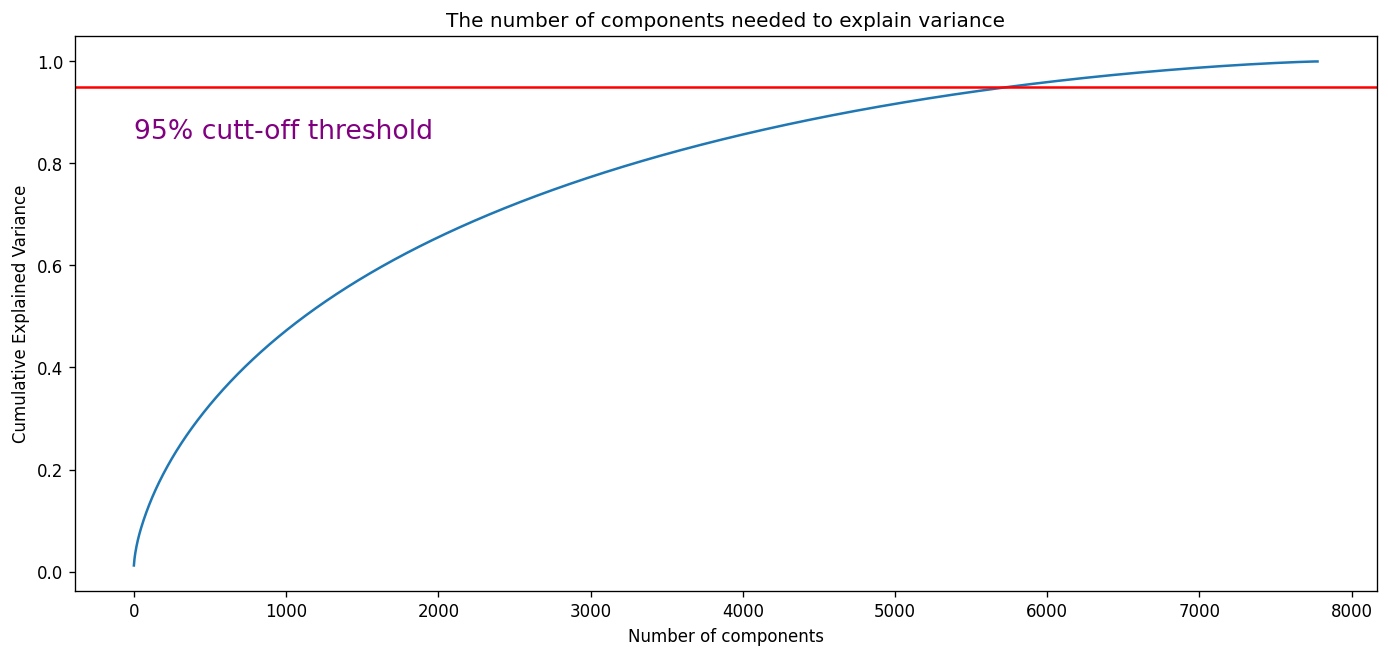

In [164]:
plt.figure(figsize =(14,6),dpi= 120)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')
plt.title('The number of components needed to explain variance')
plt.axhline(y=0.95, color='r' )
plt.text(0.5,0.85,'95% cutt-off threshold', color = 'purple',fontsize = 16)
plt.show()

In [165]:
pca_tuned = PCA(n_components= 2)
pca_tuned.fit(x)
X_transformed = pca_tuned.transform(x)
X_transformed.shape

(7777, 2)

In [166]:
#shape
print("original shape: ", x.shape)
print("transformed shape: ", X_transformed.shape)

original shape:  (7777, 20000)
transformed shape:  (7777, 2)


In [167]:
# explained variance ratio of each principal component
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# variance explained by three components
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(
                                        np.sum(pca.explained_variance_ratio_)))

Explained variation per principal component: [1.18692994e-02 4.01008646e-03 3.38605247e-03 ... 1.20577114e-35
 1.15415641e-35 1.00955457e-37]
Cumulative variance explained by 2 principal components: 100.00%


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here:-
I have used PCA (principal component analysis) as a dimensionality reduction technique. PCA is a linear dimensionality reduction technique that identifies the principal components of the data. The principal components are the directions in which the data varies the most.

PCA is a good choice for dimensionality reduction because it is relatively simple to understand and implement. It is also a very effective technique for reducing the dimensionality of data while preserving as much of the information as possible.

In addition, PCA is a non-parametric technique, which means that it does not make any assumptions about the distribution of the data. This makes it a versatile technique that can be used with a wide variety of data.

### 8. Data Splitting

In [168]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here:-In clustering, we do not need to split the data into training and test sets. This is because clustering is an unsupervised learning problem, which means that we do not have any labels to train the model on.

### 9. Handling Imbalanced Dataset

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7777 non-null   object        
 1   type          7777 non-null   object        
 2   title         7777 non-null   object        
 3   director      7777 non-null   object        
 4   cast          7777 non-null   object        
 5   country       7777 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7777 non-null   int64         
 8   rating        7777 non-null   object        
 9   duration      7777 non-null   object        
 10  listed_in     7777 non-null   object        
 11  description   7777 non-null   object        
 12  days          7777 non-null   int64         
 13  month         7777 non-null   int64         
 14  year          7777 non-null   int64         
 15  text_data     7777 non-null   object  

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.No the dataset is not imbalanced.

In [170]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 :- KMeans Clustering

In [171]:
# ML Model - 1 Implementation
from sklearn.cluster import KMeans

#Within cluster Sum of squared Errors(WCSS) for different values of k
plt.figure(figsize = (10,6), dpi = 120)

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter=300, n_init=10,random_state =20)
  kmeans.fit(X_transformed)
  wcss.append(kmeans.inertia_)

<Figure size 1200x720 with 0 Axes>

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

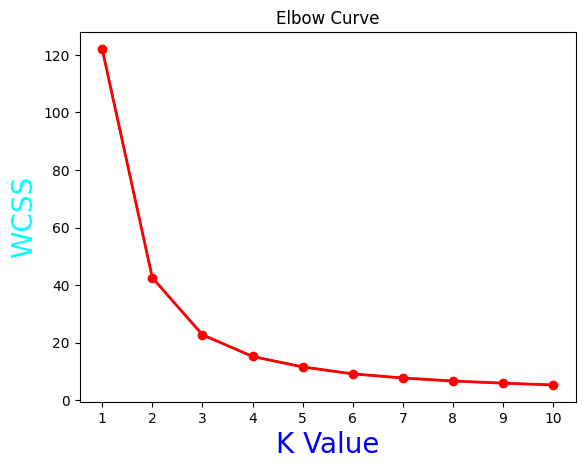

In [191]:
# Visualizing evaluation Metric Score chart
#elbow curve
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="o")
plt.xlabel("K Value", size = 20, color = 'blue')
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS", size = 20, color = 'cyan')
plt.title('Elbow Curve')
plt.show()

The curve looks like an elbow. In the above plot, the elbow is at k=2 (i.e., the Sum of squared distances falls suddenly), indicating the optimal k for this dataset is .

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



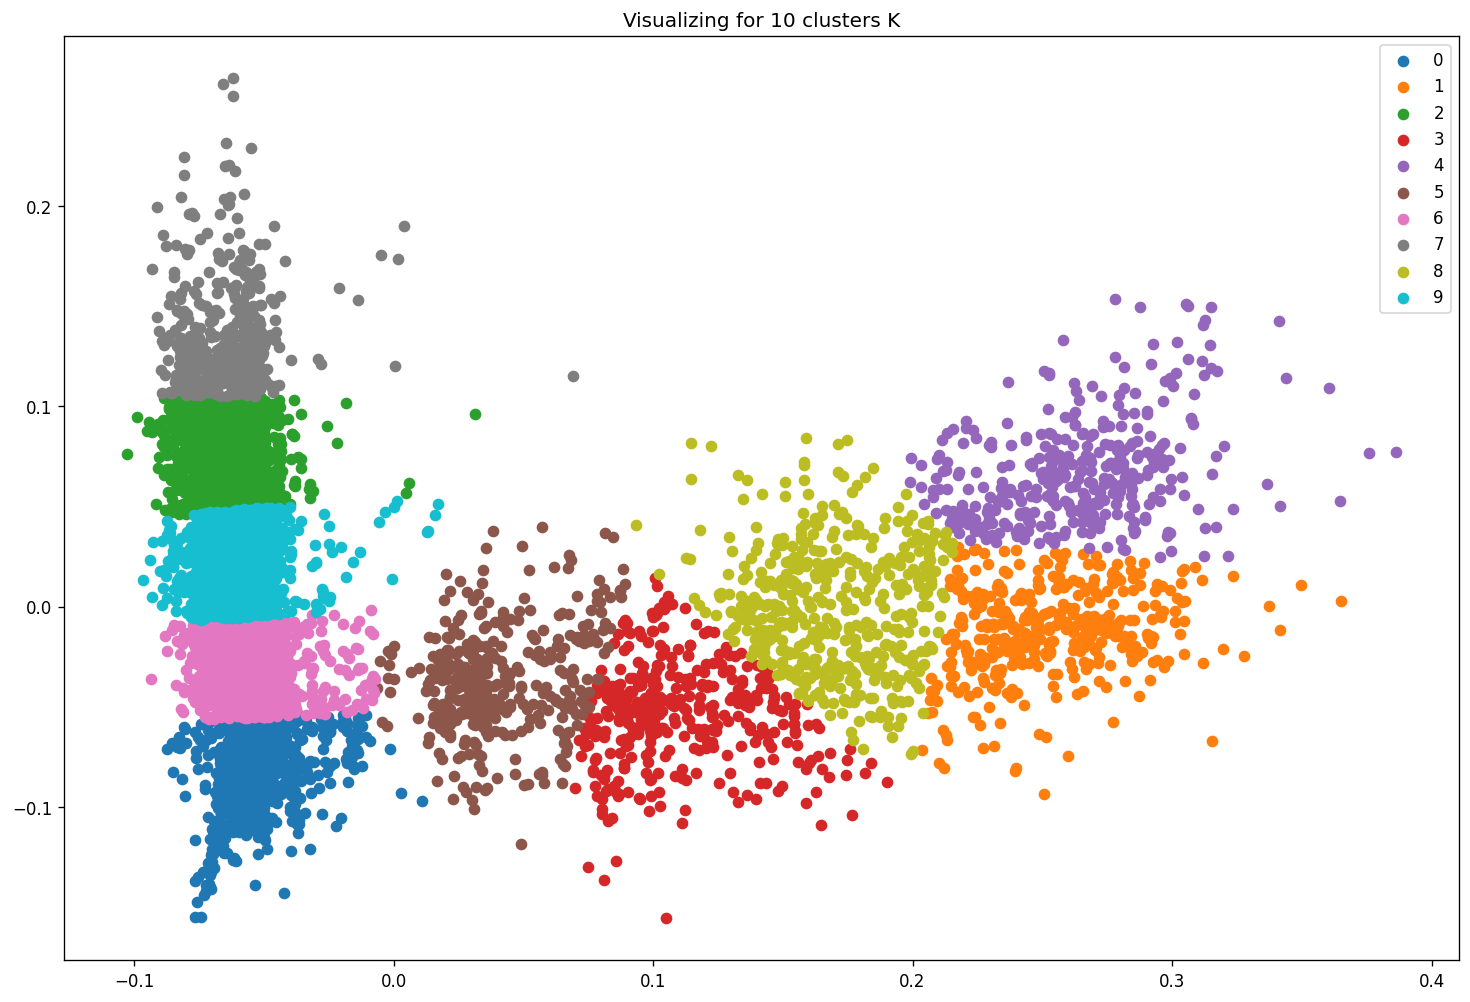

In [192]:
#vizualizing the clusters and the datapoints in each clusters
plt.figure(figsize = (15,10), dpi = 120)

kmeans= KMeans(n_clusters = 10, init= 'k-means++', random_state = 42)
kmeans.fit(X_transformed)

#predict the labels of clusters.
label = kmeans.fit_predict(X_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(X_transformed[label == i , 0] , X_transformed[label == i , 1] , label = i)
    plt.title('Visualizing for 10 clusters K')
plt.legend()
plt.show()

Here we just observed that for 10 clusters. we can conclude that our clusters are well defined and they are not overlapping.

In [193]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_transformed)
y_kmeans = kmeans.predict(X_transformed)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



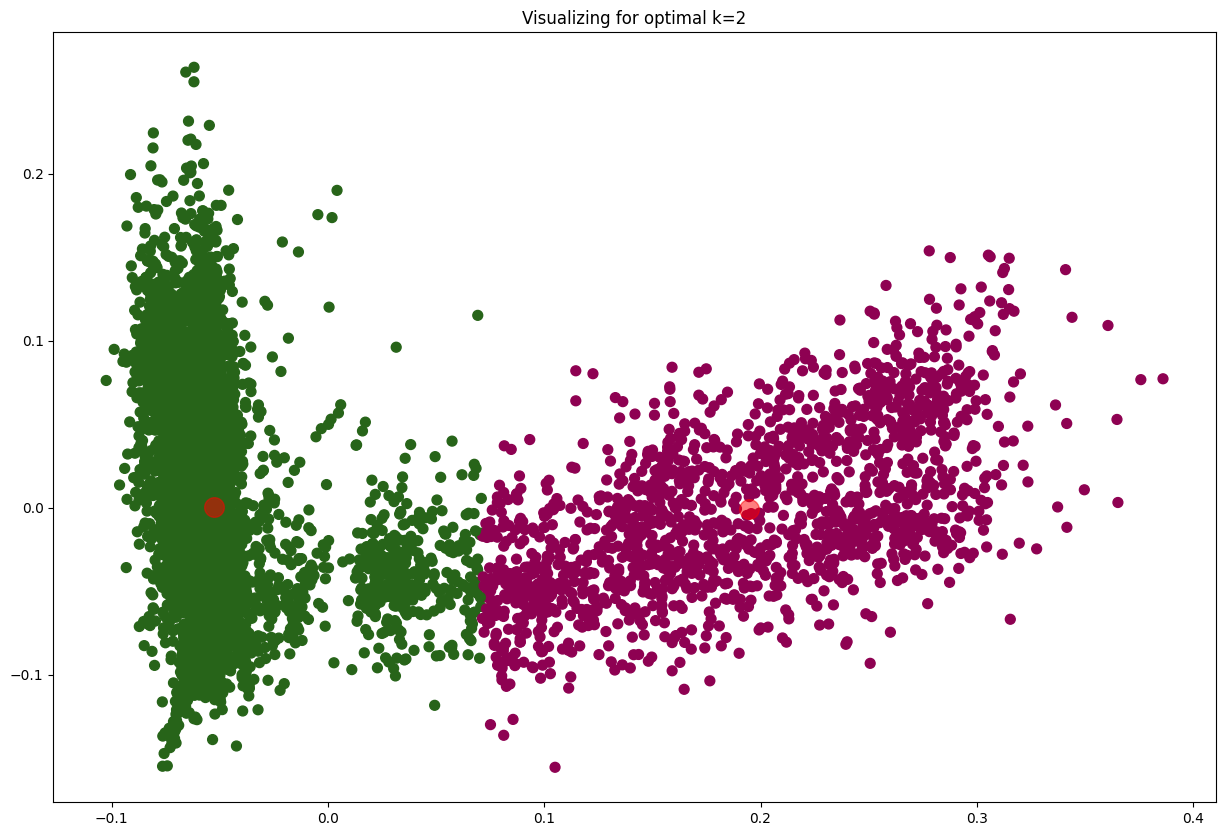

In [195]:
plt.figure(figsize=(15,10))
plt.title('Visualizing for optimal k=2')
plt.scatter(X_transformed[:,0],X_transformed[:,1],c=y_kmeans, s=50, cmap='PiYG')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200,alpha=0.5)

In [196]:
model = KMeans(n_clusters = 2, init = "k-means++" , max_iter=300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(X_transformed)

In [197]:
from os import X_OK
print(X_transformed[y_clusters == 0,0][1])
print(X_transformed[y_clusters == 0,1][1])

-0.06342201037416087
0.02070933012313853


#### 2. Cross- Validation & Hyperparameter Tuning


In general, cross-validation and hyperparameter tuning are not necessary for clustering models. This is because clustering is an unsupervised learning problem, which means that we do not have any labels to train the model on. As a result, it is difficult to assess the accuracy of the clustering model using cross-validation.

In [173]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [174]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [175]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [176]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [177]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [178]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [179]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [180]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***